In [445]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On Met les ventes par canal sur 1 ligne

In [446]:
df = pd.read_csv('ventes_luxe_détaillées.csv', sep=',')

# On cherche pour des erreurs ou NA

In [447]:
# Copie initiale pour les lignes supprimées
original_df = df.copy()

# Vérification des dates
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Les valeurs invalides deviennent NaT

# Vérification des colonnes numériques
numeric_columns = ["Événement spécial", "Mois", "Année", "Montant des ventes"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Les valeurs invalides deviennent NaN

# Vérification des valeurs dans "Catégorie"
valid_categories = ["Mode", "Accessoires", "Parfums", "Joaillerie", "Montres", "Maroquinerie"]
df["Catégorie"] = df["Catégorie"].where(df["Catégorie"].isin(valid_categories), None)  # Remplace les valeurs invalides par None

# Vérification des valeurs dans "Canal de vente"
valid_channels = ["Ventes en ligne", "Boutiques physiques", "Ventes privées", "Grands Magasins"]
df["Canal de vente"] = df["Canal de vente"].where(df["Canal de vente"].isin(valid_channels), None)  # Remplace les valeurs invalides par None

# Identification des lignes invalides
invalid_rows = original_df[~df.notna().all(axis=1)]  # Lignes non valides
valid_rows = df.dropna()  # Lignes valides après nettoyage

# Affichage des lignes supprimées
print("Lignes supprimées :")
print(invalid_rows)

# Affichage des lignes valides
print("\nDataFrame nettoyé :")
print(valid_rows)
df = valid_rows

Lignes supprimées :
                 Date Catégorie Canal de vente  Événement spécial  Mois  \
52584  .2689999999998       NaN            NaN                NaN   NaN   

       Année  Montant des ventes  
52584    NaN                 NaN  

DataFrame nettoyé :
            Date     Catégorie       Canal de vente  Événement spécial  Mois  \
0     2018-01-01          Mode      Ventes en ligne                1.0   1.0   
1     2018-01-01          Mode  Boutiques physiques                1.0   1.0   
2     2018-01-01          Mode       Ventes privées                1.0   1.0   
3     2018-01-01          Mode      Grands Magasins                1.0   1.0   
4     2018-01-01   Accessoires      Ventes en ligne                1.0   1.0   
...          ...           ...                  ...                ...   ...   
61340 2023-12-31       Montres      Grands Magasins                1.0  12.0   
61341 2023-12-31  Maroquinerie      Ventes en ligne                1.0  12.0   
61342 2023-12-31  

# Pivot Table & Renames

In [448]:

df["Jour"] = df["Date"].dt.day
df.rename(columns={"Montant des ventes": "Montant_Ventes"}, inplace=True)
df.rename(columns={"Événement spécial": "Événement_spécial"}, inplace=True)
df.rename(columns={"Canal de vente": "Canal_Vente"}, inplace=True)


df_pivot = df.pivot_table(index=['Date', 'Catégorie', 'Événement_spécial', 'Mois', 'Année', 'Jour'],
                          columns='Canal_Vente', values='Montant_Ventes').reset_index()

# On pivote les colonnes
df_pivot.columns = ['Date', 'Catégorie', 'Événement_spécial', 'Mois', 'Année', 'Jour'] + \
                   ['Montant_' + canal.replace(' ', '_') for canal in df_pivot.columns[6:]]

df_pivot.fillna(0, inplace=True)

# Convert de float a int
montant_cols = [col for col in df_pivot.columns if col.startswith('Montant_Ventes')]
df_pivot[montant_cols] = df_pivot[montant_cols].astype(int)

df_pivot['Mois'] = df_pivot['Mois'].apply(lambda x: f"{x:02}")

# Calculer le jour de la semaine en prenant comme référence que '2018-01-01' est un lundi

df = df_pivot

df['Jour_Semaine'] = (df['Date'] - pd.Timestamp('2018-01-01')).dt.days % 7 + 1

df["Montant_Ventes_Totales"] = df["Montant_Boutiques_physiques"] + df["Montant_Ventes_en_ligne"] + df["Montant_Grands_Magasins"] + df["Montant_Ventes_privées"]

df

,Date,Catégorie,Événement_spécial,Mois,Année,Jour,Montant_Boutiques_physiques,Montant_Grands_Magasins,Montant_Ventes_en_ligne,Montant_Ventes_privées,Jour_Semaine,Montant_Ventes_Totales
0,2018-01-01,Accessoires,1.0,1.0,2018.0,1,3037.0800,4325.0400,1630,7759,1,16751.1200
1,2018-01-01,Joaillerie,1.0,1.0,2018.0,1,2375.1240,8362.8960,4696,7728,1,23162.0200
2,2018-01-01,Maroquinerie,1.0,1.0,2018.0,1,2996.7600,3608.7720,4259,3606,1,14470.5320
3,2018-01-01,Mode,1.0,1.0,2018.0,1,5969.7480,7871.2920,6761,3458,1,24060.0400
4,2018-01-01,Montres,1.0,1.0,2018.0,1,2920.0560,2020.9320,7213,2747,1,14900.9880
...,...,...,...,...,...,...,...,...,...,...,...,...
13141,2023-12-31,Joaillerie,1.0,12.0,2023.0,31,8205.8020,5335.8735,2333,7647,7,23521.6755
13142,2023-12-31,Maroquinerie,1.0,12.0,2023.0,31,2901.4845,4469.3255,3104,2663,7,13137.8100
13143,2023-12-31,Mode,1.0,12.0,2023.0,31,1815.7810,8218.6245,4610,5516,7,20160.4055
13144,2023-12-31,Montres,1.0,12.0,2023.0,31,1933.8055,2567.8465,7552,8584,7,20637.6520


# Conversion Mois Année Event_Special en Integer

In [449]:
# Conversion des colonnes "Mois", "Année" et "Événement_spécial" en float, puis en int
for col in ["Mois", "Année", "Événement_spécial"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype(int)  # Conversion en float puis en int

# Evolution des ventes totales dans le temps

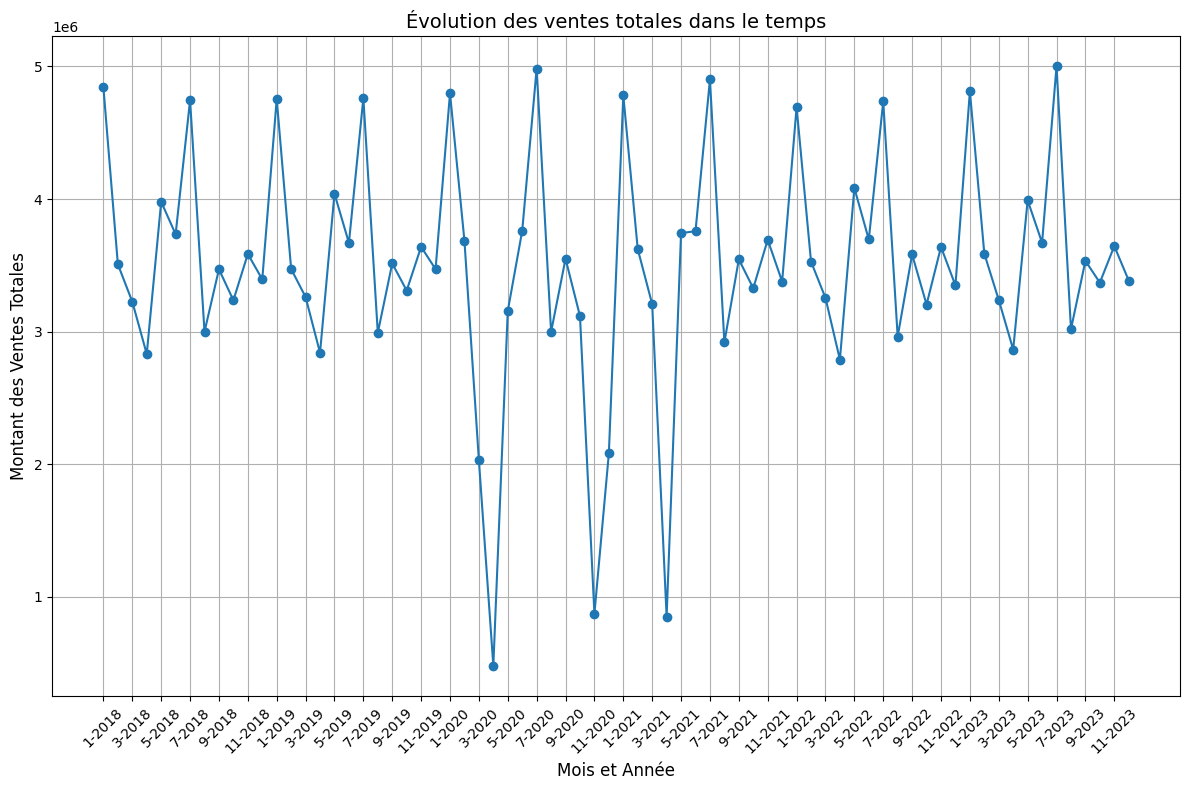

In [450]:

# Grouper les données par mois et année et calculer la somme des ventes
df_monthly_sales = df.groupby(['Année', 'Mois'])['Montant_Ventes_Totales'].sum().reset_index()

# Créer le graphique des ventes totales en fonction du temps (mois et année)
plt.figure(figsize=(12, 8))

# Tracer l'évolution des ventes totales
plt.plot(df_monthly_sales['Mois'].astype(str) + '-' + df_monthly_sales['Année'].astype(str), df_monthly_sales['Montant_Ventes_Totales'], marker='o')

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes totales dans le temps", fontsize=14)
plt.xlabel("Mois et Année", fontsize=12)
plt.ylabel("Montant des Ventes Totales", fontsize=12)

ticks = range(0, len(df_monthly_sales), 2)
labels = df_monthly_sales['Mois'].astype(str) + '-' + df_monthly_sales['Année'].astype(str)
plt.xticks(ticks=ticks, labels=labels[ticks], rotation=45)

plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()

# Evolution des ventes par catégorie au fil de temps

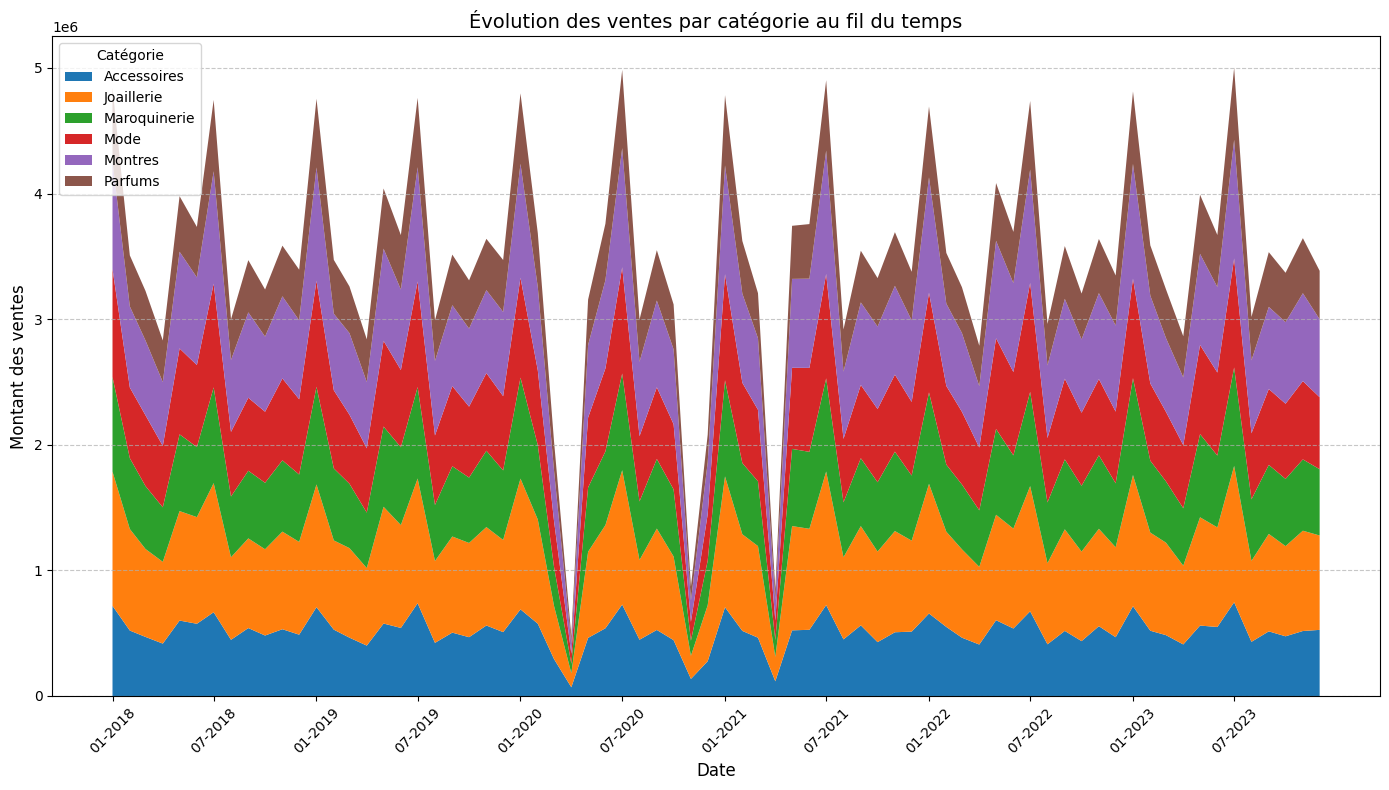

In [451]:
# Calcul des ventes par catégorie pour chaque mois et année
df_grouped = df.groupby(['Année', 'Mois', 'Catégorie'])['Montant_Ventes_Totales'].sum().reset_index()

# Création d'une colonne de date pour un tri chronologique
df_grouped['Date'] = pd.to_datetime(df_grouped['Année'].astype(str) + '-' + df_grouped['Mois'].astype(str) + '-01')

# Pivot pour préparer les données pour un graphique empilé
df_pivot = df_grouped.pivot(index='Date', columns='Catégorie', values='Montant_Ventes_Totales').fillna(0)

# Préparation des données pour stackplot
dates = df_pivot.index
categories = df_pivot.columns
values = [df_pivot[category] for category in categories]

# Création du graphique en ligne empilé
plt.figure(figsize=(14, 8))
plt.stackplot(dates, values, labels=categories)

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes par catégorie au fil du temps", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Montant des ventes", fontsize=12)

# Affichage de la légende
plt.legend(title="Catégorie", loc='upper left')

# Ajuster les ticks de l'axe X
plt.xticks(ticks=dates[::6], labels=dates[::6].strftime('%m-%Y'), rotation=45)

# Afficher le graphique
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Proportion des ventes par catégorie au fil du temps ramené à 100%

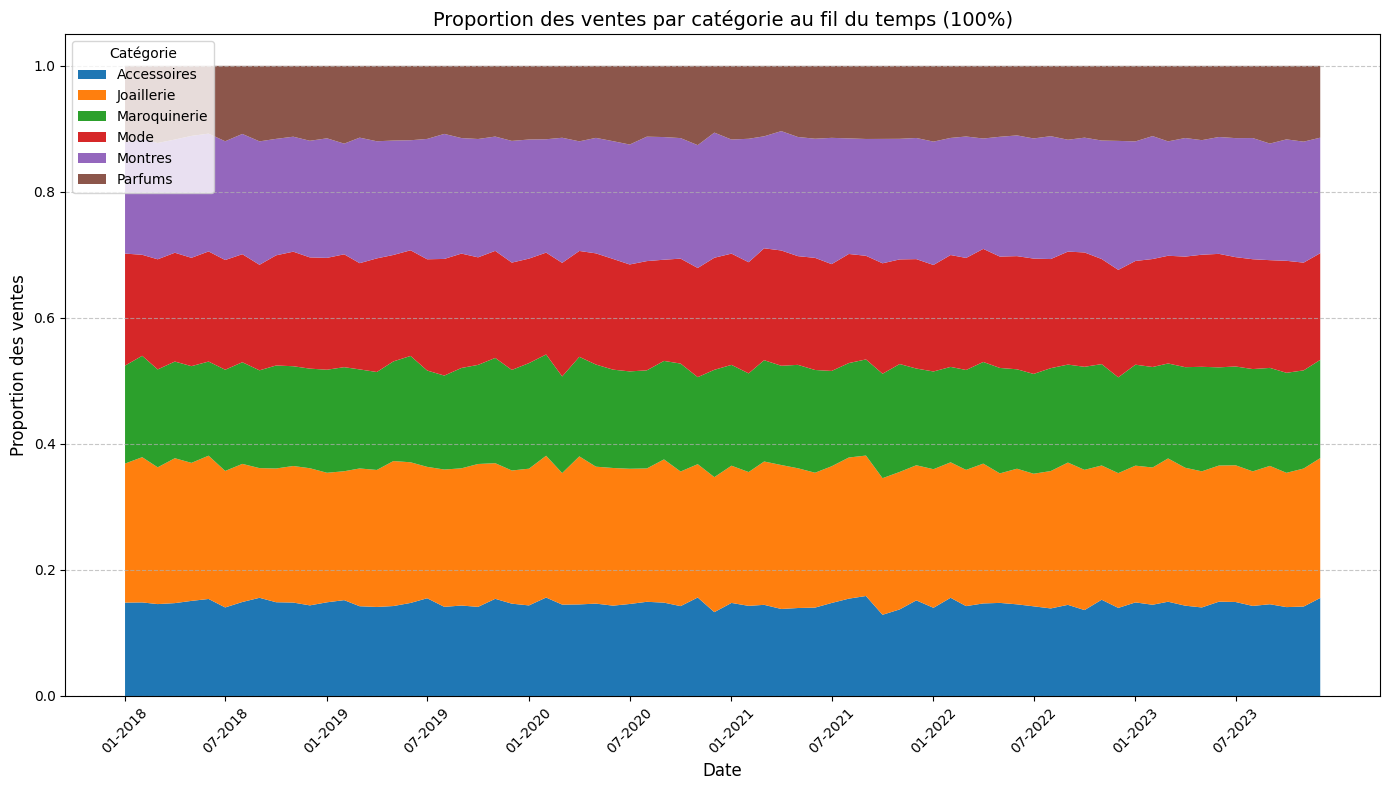

In [452]:

# Calcul des ventes par catégorie pour chaque mois et année
df_grouped = df.groupby(['Année', 'Mois', 'Catégorie'])['Montant_Ventes_Totales'].sum().reset_index()

# Création d'une colonne de date pour un tri chronologique
df_grouped['Date'] = pd.to_datetime(df_grouped['Année'].astype(str) + '-' + df_grouped['Mois'].astype(str) + '-01')

# Pivot pour préparer les données pour un graphique empilé
df_pivot = df_grouped.pivot(index='Date', columns='Catégorie', values='Montant_Ventes_Totales').fillna(0)

# Normaliser les données pour chaque période (somme à 100%)
df_pivot_normalized = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Préparation des données pour stackplot
dates = df_pivot_normalized.index
categories = df_pivot_normalized.columns
values = [df_pivot_normalized[category] for category in categories]

# Création du graphique en ligne empilé à 100%
plt.figure(figsize=(14, 8))
plt.stackplot(dates, values, labels=categories)

# Ajouter un titre et des labels aux axes
plt.title("Proportion des ventes par catégorie au fil du temps (100%)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Proportion des ventes", fontsize=12)

# Affichage de la légende
plt.legend(title="Catégorie", loc='upper left')

# Ajuster les ticks de l'axe X
plt.xticks(ticks=dates[::6], labels=dates[::6].strftime('%m-%Y'), rotation=45)

# Afficher le graphique
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Camembert de répartition des ventes par catégorie de produit

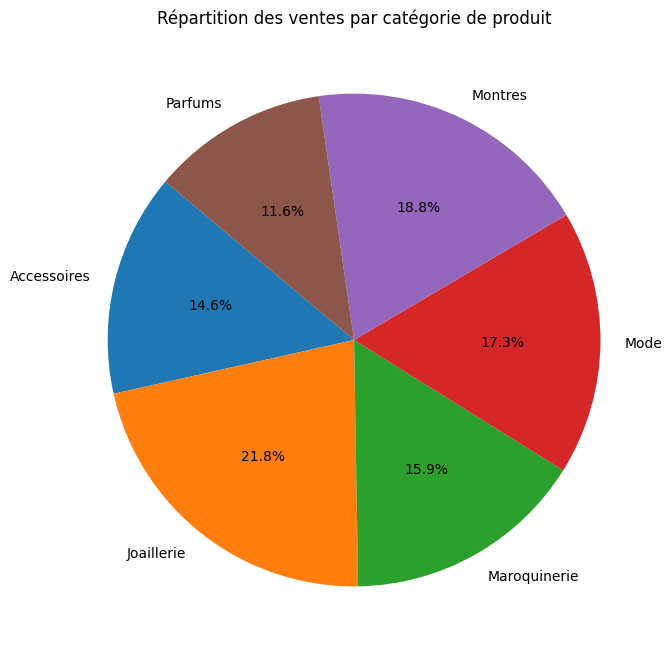

In [453]:
# Calcul de la répartition des ventes par catégorie de produit
sales_by_category = df.groupby('Catégorie')['Montant_Ventes_Totales'].mean()

# Création du diagramme en secteurs
plt.figure(figsize=(8, 8))
sales_by_category.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Répartition des ventes par catégorie de produit")
plt.ylabel("")  # Cache l'étiquette de l'axe y
plt.show()

# Graph en bar de l'impact des événements spéciaux sur les ventes

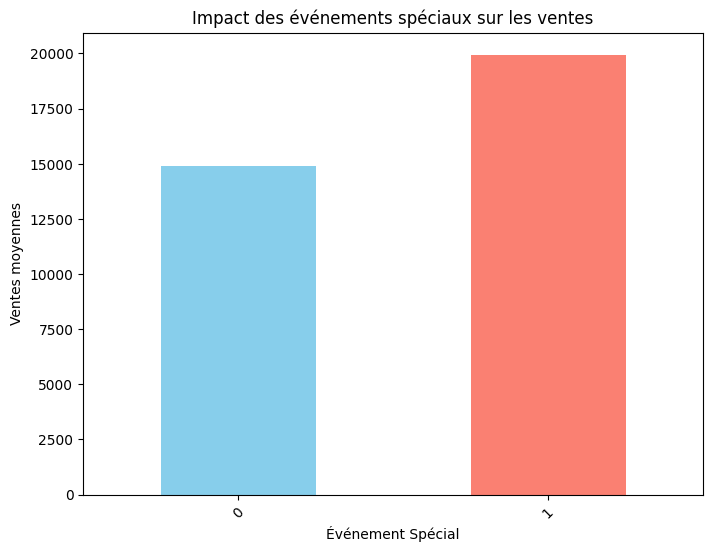

In [454]:
# Calcul des ventes moyennes avec et sans événements spéciaux
df_special_event = df.groupby('Événement_spécial')['Montant_Ventes_Totales'].mean()

# Création du graphique en barres
plt.figure(figsize=(8, 6))
df_special_event.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Impact des événements spéciaux sur les ventes")
plt.xlabel("Événement Spécial")
plt.ylabel("Ventes moyennes")
plt.xticks(rotation=45)
plt.show()

In [455]:
print(df.columns)

Index(['Date', 'Catégorie', 'Événement_spécial', 'Mois', 'Année', 'Jour',
       'Montant_Boutiques_physiques', 'Montant_Grands_Magasins',
       'Montant_Ventes_en_ligne', 'Montant_Ventes_privées', 'Jour_Semaine',
       'Montant_Ventes_Totales'],
      dtype='object')


# Graph en bar des ventes par catégorie de produit et type de vente ramené à 100%

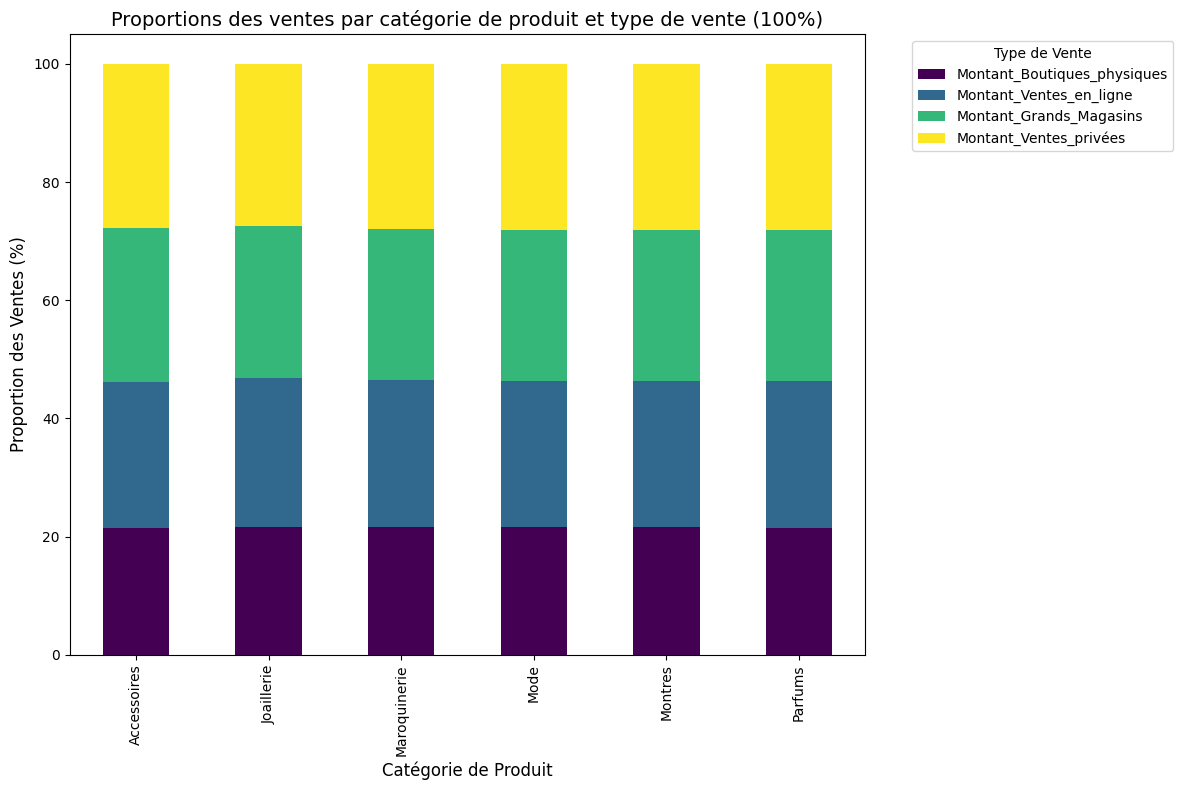

In [456]:
# Calcul des moyennes par catégorie pour les colonnes de ventes
df_somme = df.groupby("Catégorie").mean(numeric_only=True)[[
    "Montant_Boutiques_physiques",
    "Montant_Ventes_en_ligne",
    "Montant_Grands_Magasins",
    "Montant_Ventes_privées",
]]

# Normalisation des données pour obtenir des proportions
df_somme_normalized = df_somme.div(df_somme.sum(axis=1), axis=0) * 100  # Convertir en pourcentage

# Créer le graphique en barres empilées à 100%
ax = df_somme_normalized.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="viridis")

# Ajouter un titre et des labels aux axes
plt.title("Proportions des ventes par catégorie de produit et type de vente (100%)", fontsize=14)
plt.xlabel("Catégorie de Produit", fontsize=12)
plt.ylabel("Proportion des Ventes (%)", fontsize=12)

# Ajouter la légende et afficher le graphique
plt.legend(title="Type de Vente", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [457]:
df

,Date,Catégorie,Événement_spécial,Mois,Année,Jour,Montant_Boutiques_physiques,Montant_Grands_Magasins,Montant_Ventes_en_ligne,Montant_Ventes_privées,Jour_Semaine,Montant_Ventes_Totales
0,2018-01-01,Accessoires,1,1,2018,1,3037.0800,4325.0400,1630,7759,1,16751.1200
1,2018-01-01,Joaillerie,1,1,2018,1,2375.1240,8362.8960,4696,7728,1,23162.0200
2,2018-01-01,Maroquinerie,1,1,2018,1,2996.7600,3608.7720,4259,3606,1,14470.5320
3,2018-01-01,Mode,1,1,2018,1,5969.7480,7871.2920,6761,3458,1,24060.0400
4,2018-01-01,Montres,1,1,2018,1,2920.0560,2020.9320,7213,2747,1,14900.9880
...,...,...,...,...,...,...,...,...,...,...,...,...
13141,2023-12-31,Joaillerie,1,12,2023,31,8205.8020,5335.8735,2333,7647,7,23521.6755
13142,2023-12-31,Maroquinerie,1,12,2023,31,2901.4845,4469.3255,3104,2663,7,13137.8100
13143,2023-12-31,Mode,1,12,2023,31,1815.7810,8218.6245,4610,5516,7,20160.4055
13144,2023-12-31,Montres,1,12,2023,31,1933.8055,2567.8465,7552,8584,7,20637.6520


# Évolution des ventes par canaux de ventes au fil du temps

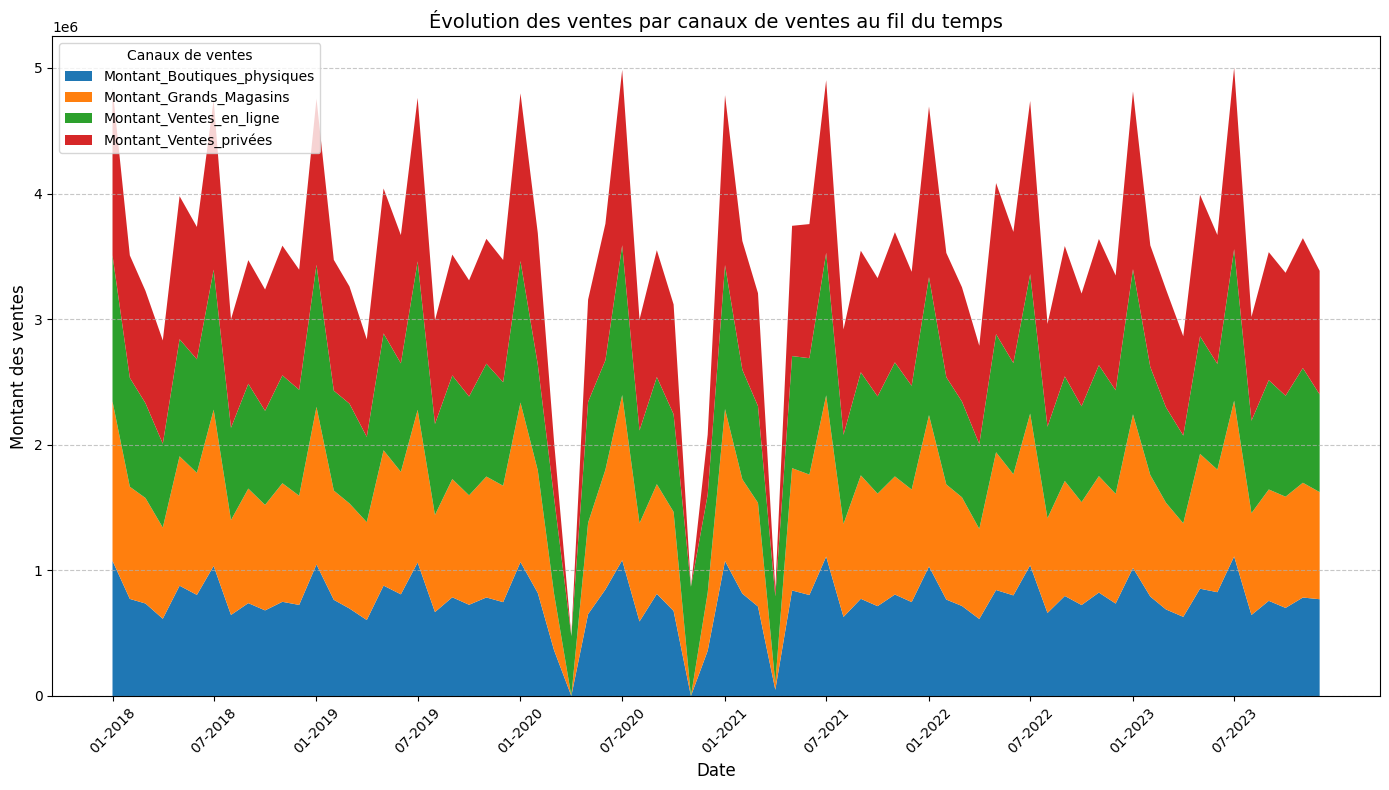

In [458]:
# Calcul des ventes par canaux de ventes pour chaque mois et année
df_grouped = df.groupby(['Année', 'Mois']).agg({
    'Montant_Boutiques_physiques': 'sum',
    'Montant_Grands_Magasins': 'sum',
    'Montant_Ventes_en_ligne': 'sum',
    'Montant_Ventes_privées': 'sum',
}).reset_index()

# Création d'une colonne de date pour un tri chronologique
df_grouped['Date'] = pd.to_datetime(df_grouped['Année'].astype(str) + '-' + df_grouped['Mois'].astype(str) + '-01')

# Pivot pour préparer les données pour un graphique empilé
df_grouped = df_grouped.set_index('Date')
canaux = ['Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées']
values = [df_grouped[c] for c in canaux]

# Création du graphique en ligne empilé
plt.figure(figsize=(14, 8))
plt.stackplot(df_grouped.index, values, labels=canaux)

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes par canaux de ventes au fil du temps", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Montant des ventes", fontsize=12)

# Affichage de la légende
plt.legend(title="Canaux de ventes", loc='upper left')

# Ajuster les ticks de l'axe X
plt.xticks(ticks=df_grouped.index[::6], labels=df_grouped.index[::6].strftime('%m-%Y'), rotation=45)

# Afficher le graphique
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Évolution des proportions de ventes par canaux au fil du temps (100%)

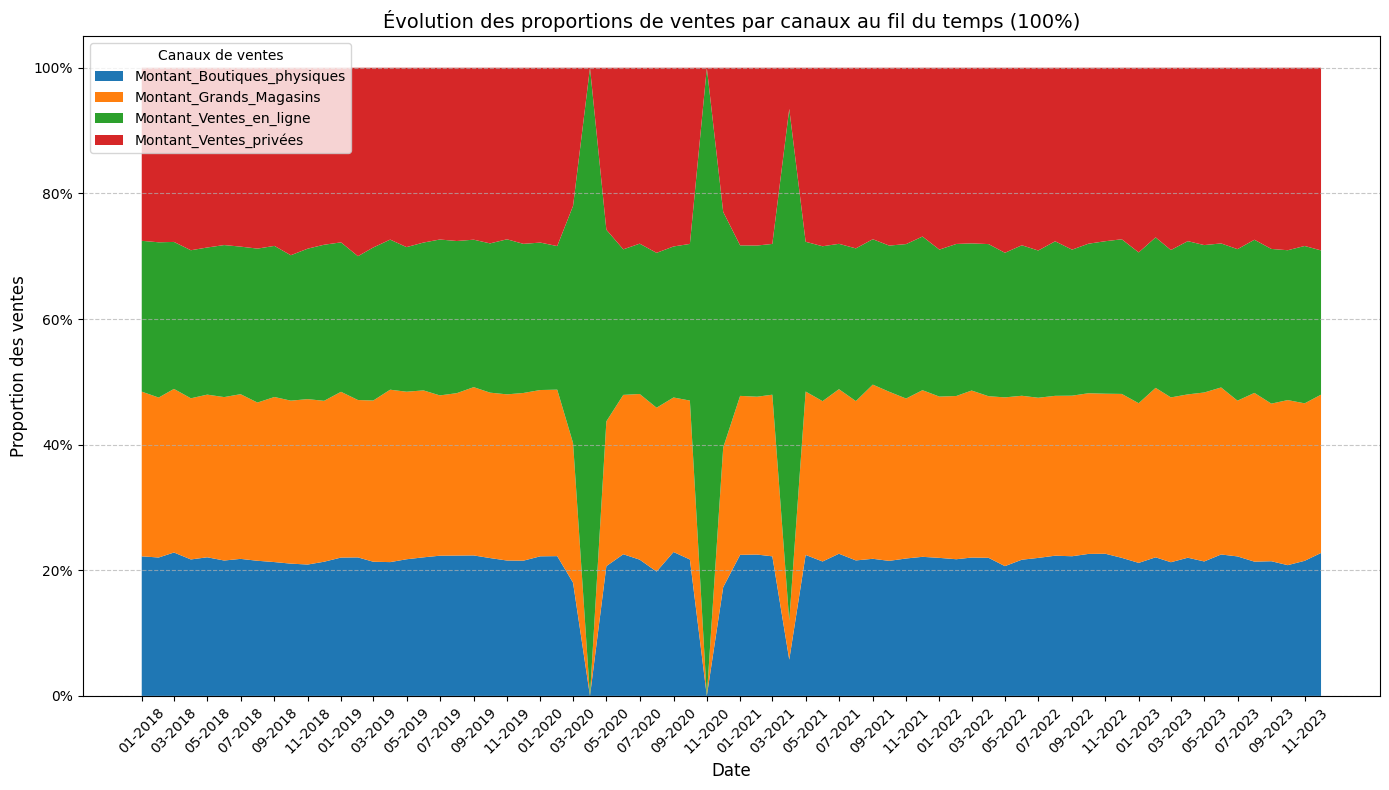

In [459]:
# Calcul des ventes par canaux de ventes pour chaque mois et année
df_grouped = df.groupby(['Année', 'Mois']).agg({
    'Montant_Boutiques_physiques': 'sum',
    'Montant_Grands_Magasins': 'sum',
    'Montant_Ventes_en_ligne': 'sum',
    'Montant_Ventes_privées': 'sum',
}).reset_index()

# Création d'une colonne de date pour un tri chronologique
df_grouped['Date'] = pd.to_datetime(df_grouped['Année'].astype(str) + '-' + df_grouped['Mois'].astype(str) + '-01')

# Normalisation des valeurs pour obtenir des proportions (100%)
df_grouped = df_grouped.set_index('Date')
canaux = ['Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées']
df_grouped['Total_Ventes'] = df_grouped[canaux].sum(axis=1)
for canal in canaux:
    df_grouped[canal] = df_grouped[canal] / df_grouped['Total_Ventes']

# Préparation des données pour stackplot
values = [df_grouped[c] for c in canaux]

# Création du graphique empilé à 100%
plt.figure(figsize=(14, 8))
plt.stackplot(df_grouped.index, values, labels=canaux)

# Ajouter un titre et des labels aux axes
plt.title("Évolution des proportions de ventes par canaux au fil du temps (100%)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Proportion des ventes", fontsize=12)

# Affichage de la légende
plt.legend(title="Canaux de ventes", loc='upper left')

# Ajuster les ticks de l'axe X
plt.xticks(ticks=df_grouped.index[::2], labels=df_grouped.index[::2].strftime('%m-%Y'), rotation=45)

# Ajouter des lignes de référence pour chaque 20% sur l'axe des ordonnées
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

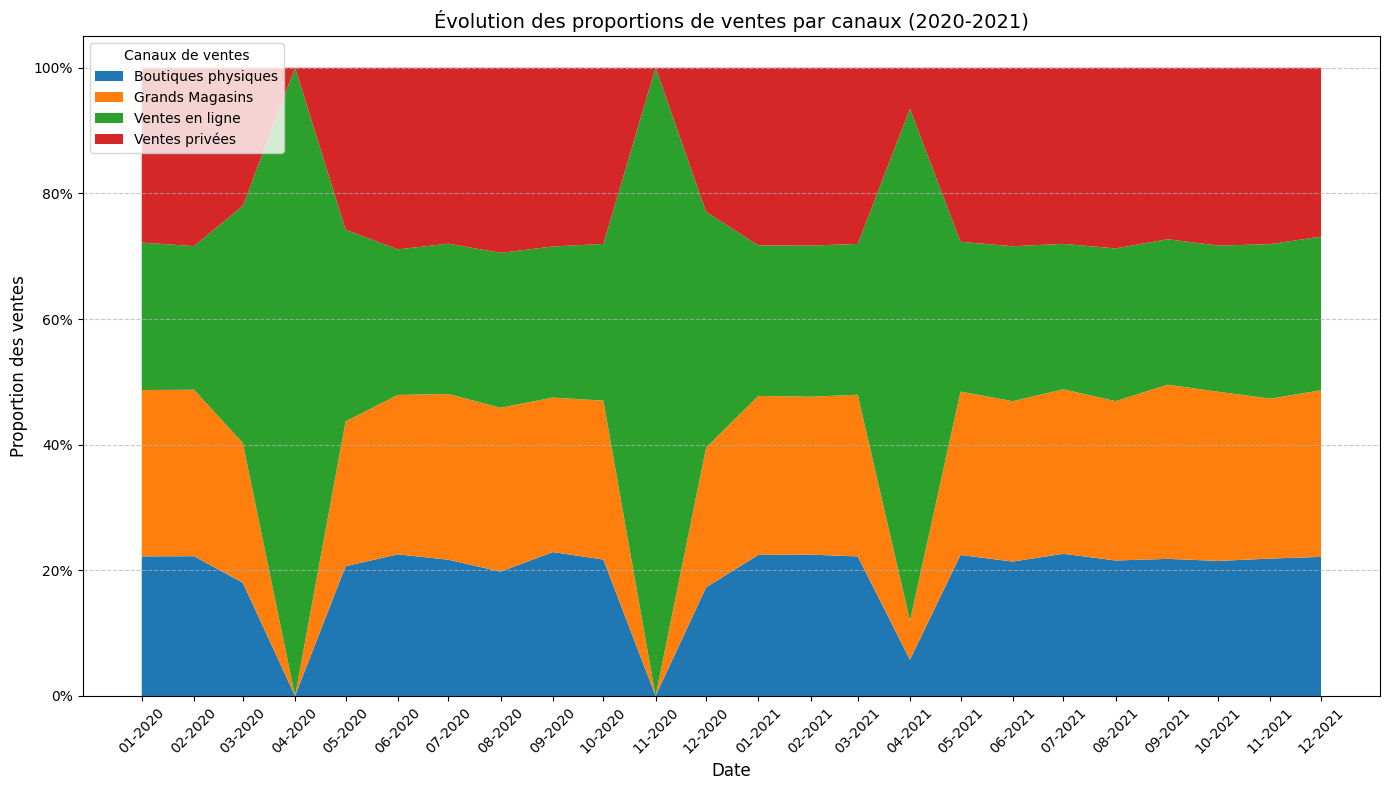

In [460]:
# Filtrer les données pour la plage de dates spécifiée
df_zoomed = df_grouped.loc['2020-01-01':'2021-12-31']

# Préparation des données pour stackplot (plage filtrée)
values_zoomed = [df_zoomed['Montant_Boutiques_physiques'], 
                 df_zoomed['Montant_Grands_Magasins'], 
                 df_zoomed['Montant_Ventes_en_ligne'], 
                 df_zoomed['Montant_Ventes_privées']]

# Création du graphique empilé pour la plage de dates spécifiée
plt.figure(figsize=(14, 8))
plt.stackplot(df_zoomed.index, values_zoomed, 
              labels=['Boutiques physiques', 'Grands Magasins', 'Ventes en ligne', 'Ventes privées'])

# Ajouter un titre et des labels aux axes
plt.title("Évolution des proportions de ventes par canaux (2020-2021)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Proportion des ventes", fontsize=12)

# Affichage de la légende
plt.legend(title="Canaux de ventes", loc='upper left')

# Ajuster les ticks de l'axe X pour la plage filtrée
plt.xticks(ticks=df_zoomed.index[::1], labels=df_zoomed.index[::1].strftime('%m-%Y'), rotation=45)

# Ajouter des lignes de référence pour chaque 20% sur l'axe des ordonnées
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()


### Les dates de ces 3 évènements coïncides avec les dates des 3 confinements : 
        - du 17 mars au 11 mai 2020 non inclus, soit 1 mois et 25 jours ;
        - du 30 octobre au 15 décembre 2020 non inclus, soit 1 mois et 15 jours ;
        - du 3 avril au 3 mai 2021 non inclus, soit 28 jours.

# Évolution des ventes par catégorie de produit dans le temps (Mois)

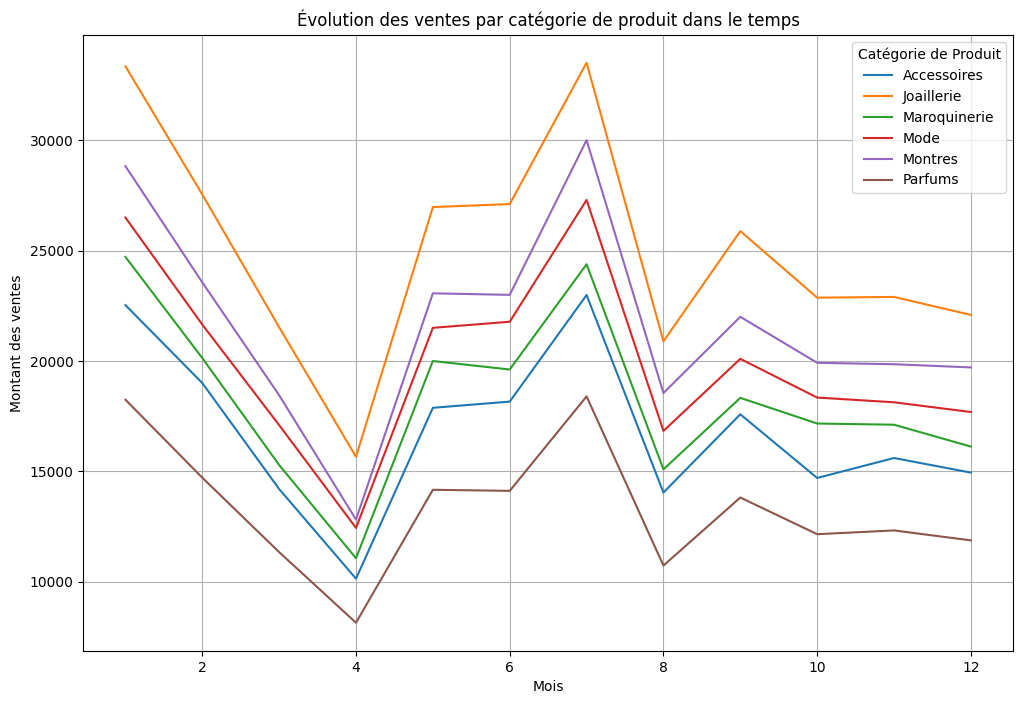

In [461]:
# Grouper par mois, et catégorie de produit pour calculer la somme des ventes
df_category_sales = df.groupby([ 'Mois', 'Catégorie'])['Montant_Ventes_Totales'].mean().reset_index()

df_category_sales


# Création du graphique en lignes multiples
plt.figure(figsize=(12, 8))
for category in df_category_sales['Catégorie'].unique():
    data = df_category_sales[df_category_sales['Catégorie'] == category]
    plt.plot(data['Mois'], data['Montant_Ventes_Totales'], label=category)

plt.title("Évolution des ventes par catégorie de produit dans le temps")
plt.xlabel("Mois")
plt.ylabel("Montant des ventes")
plt.legend(title="Catégorie de Produit")
plt.grid(True)
plt.show()

# Evolution des ventes par catégorie de produit dans le temps (Mois)

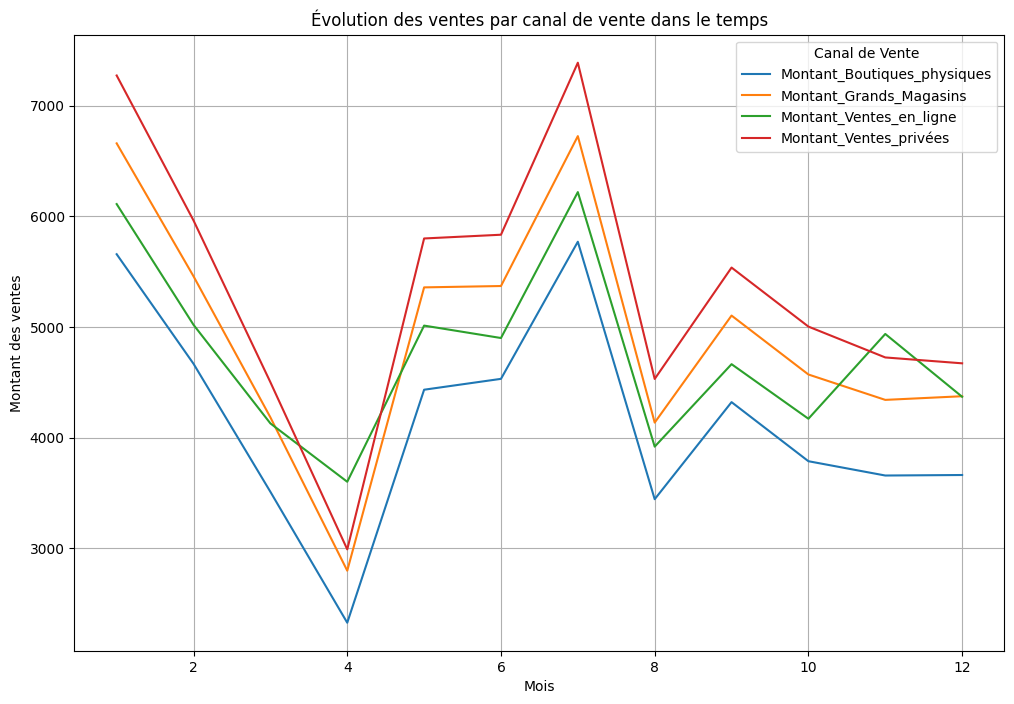

In [462]:
# Calcul des ventes totales par canal de vente pour chaque mois
df_grouped = df.groupby(['Mois']).agg({
    'Montant_Boutiques_physiques': 'mean',
    'Montant_Grands_Magasins': 'mean',
    'Montant_Ventes_en_ligne': 'mean',
    'Montant_Ventes_privées': 'mean'
}).reset_index()

# Créer le graphique en lignes multiples pour chaque canal de vente
plt.figure(figsize=(12, 8))

# Tracer chaque canal de vente
for channel in ['Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées']:
    plt.plot(df_grouped['Mois'], df_grouped[channel], label=channel)

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes par canal de vente dans le temps")
plt.xlabel("Mois")
plt.ylabel("Montant des ventes")
plt.legend(title="Canal de Vente")
plt.grid(True)

# Afficher le graphique
plt.show()

    On voit une chute des ventes en Avril, dû aux confinements tombés ce mois-ci, d'où le fait que les ventes en ligne sont les plus importantes.
    On remarque la même chose en novembre.
    
    Dates des confinements :
    du 17 mars au 11 mai 2020 non inclus, soit 1 mois et 25 jours ;
    du 30 octobre au 15 décembre 2020 non inclus, soit 1 mois et 15 jours ;
    du 3 avril au 3 mai 2021 non inclus, soit 28 jours.

# Évolution des ventes par catégorie de produit dans le temps (Jour)

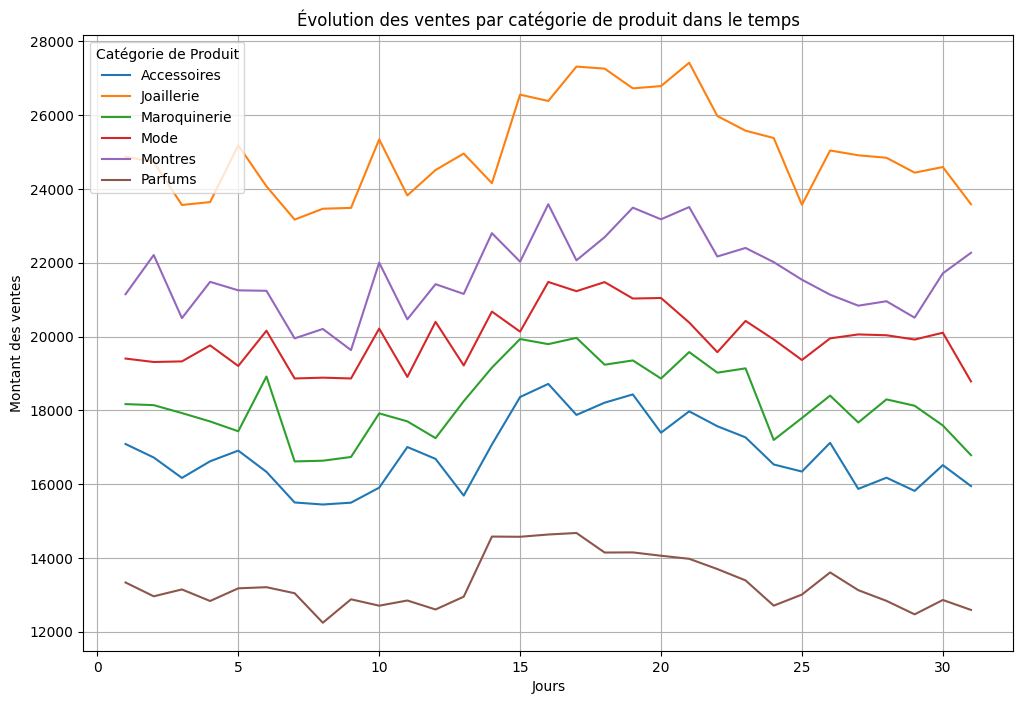

In [463]:
# Grouper par année, mois, et catégorie de produit pour calculer la somme des ventes
df_category_sales = df.groupby([ 'Jour', 'Catégorie'])['Montant_Ventes_Totales'].mean().reset_index()

df_category_sales


# Création du graphique en lignes multiples
plt.figure(figsize=(12, 8))
for category in df_category_sales['Catégorie'].unique():
    data = df_category_sales[df_category_sales['Catégorie'] == category]
    plt.plot(data['Jour'], data['Montant_Ventes_Totales'], label=category)

plt.title("Évolution des ventes par catégorie de produit dans le temps")
plt.xlabel("Jours")
plt.ylabel("Montant des ventes")
plt.legend(title="Catégorie de Produit")
plt.grid(True)
plt.show()

# Évolution des ventes par canal de vente dans le temps

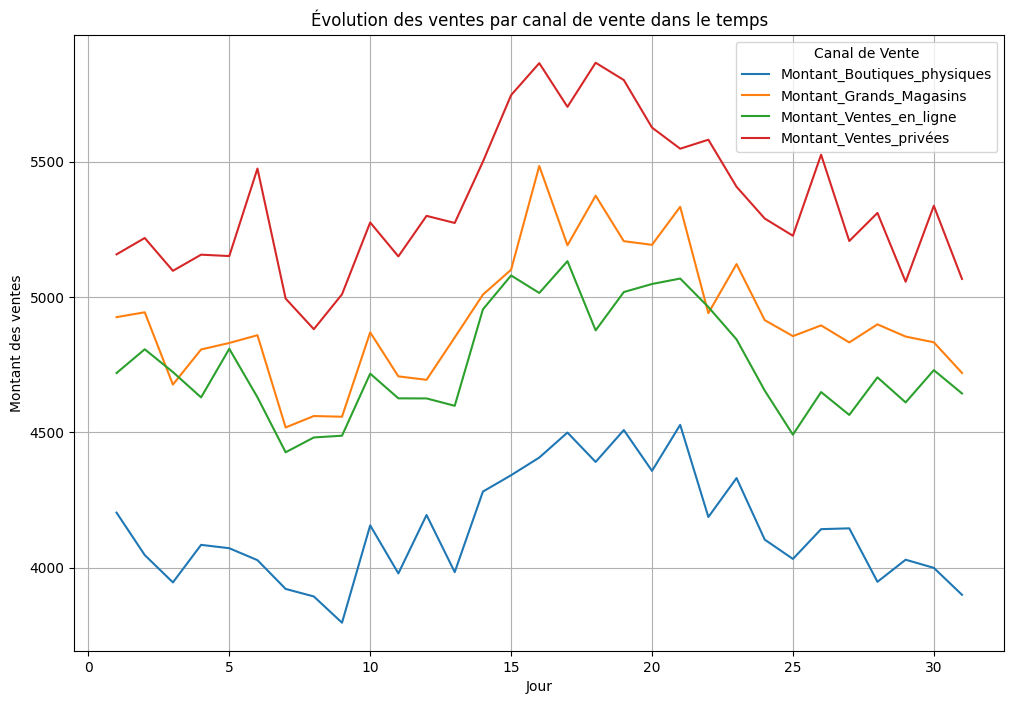

In [464]:
# Calcul des ventes totales par canal de vente pour chaque mois
df_grouped = df.groupby(['Jour']).agg({
    'Montant_Boutiques_physiques': 'mean',
    'Montant_Grands_Magasins': 'mean',
    'Montant_Ventes_en_ligne': 'mean',
    'Montant_Ventes_privées': 'mean'
}).reset_index()

# Créer le graphique en lignes multiples pour chaque canal de vente
plt.figure(figsize=(12, 8))

# Tracer chaque canal de vente
for channel in ['Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées']:
    plt.plot(df_grouped['Jour'], df_grouped[channel], label=channel)

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes par canal de vente dans le temps")
plt.xlabel("Jour")
plt.ylabel("Montant des ventes")
plt.legend(title="Canal de Vente")
plt.grid(True)

# Afficher le graphique
plt.show()

# Évolution des ventes par canal de vente dans le temps

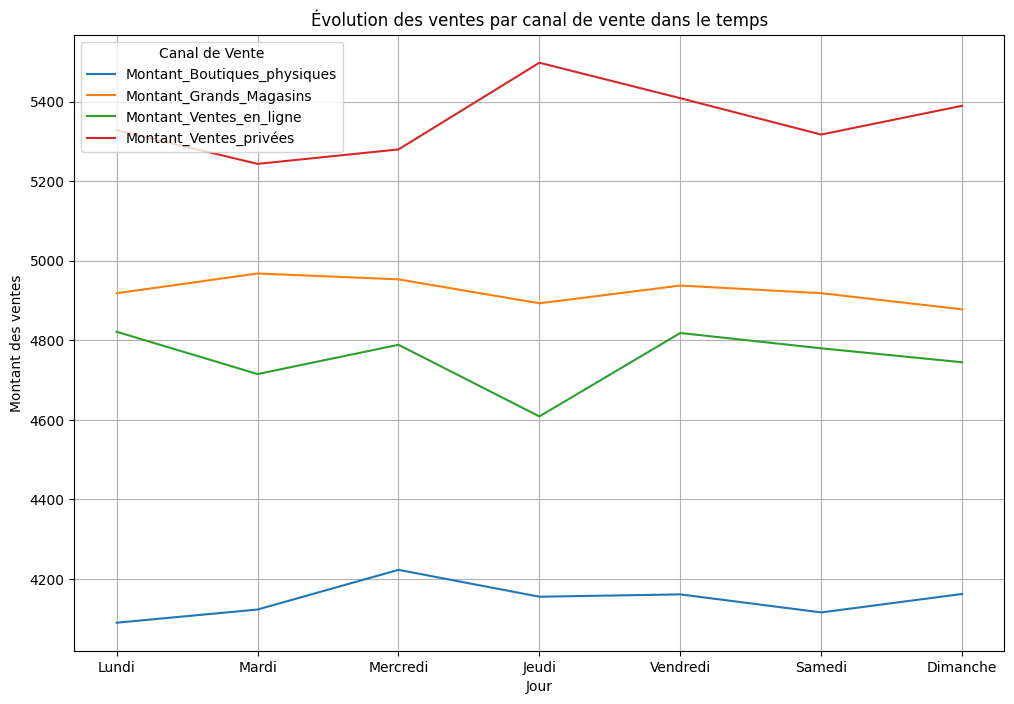

In [465]:
# Calcul des ventes totales par canal de vente pour chaque mois
df_grouped = df.groupby(['Jour_Semaine']).agg({
    'Montant_Boutiques_physiques': 'mean',
    'Montant_Grands_Magasins': 'mean',
    'Montant_Ventes_en_ligne': 'mean',
    'Montant_Ventes_privées': 'mean'
}).reset_index()

# Créer le graphique en lignes multiples pour chaque canal de vente
plt.figure(figsize=(12, 8))

# Tracer chaque canal de vente
for channel in ['Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées']:
    plt.plot(df_grouped['Jour_Semaine'], df_grouped[channel], label=channel)

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes par canal de vente dans le temps")
plt.xlabel("Jour")
plt.ylabel("Montant des ventes")


jours_semaine = {1: 'Lundi', 2: 'Mardi', 3: 'Mercredi', 4: 'Jeudi', 5: 'Vendredi', 6: 'Samedi', 7: 'Dimanche'}


# plt.xticks(ticks=range(1, 8), labels=df_category_sales['Jour_Semaine'].map(jours_semaine).unique())
plt.xticks(ticks=range(1, 8), labels=[jours_semaine[j] for j in range(1, 8)])

plt.legend(title="Canal de Vente")
plt.grid(True)

# Afficher le graphique
plt.show()

# Évolution des ventes par catégorie de produit dans la semaine

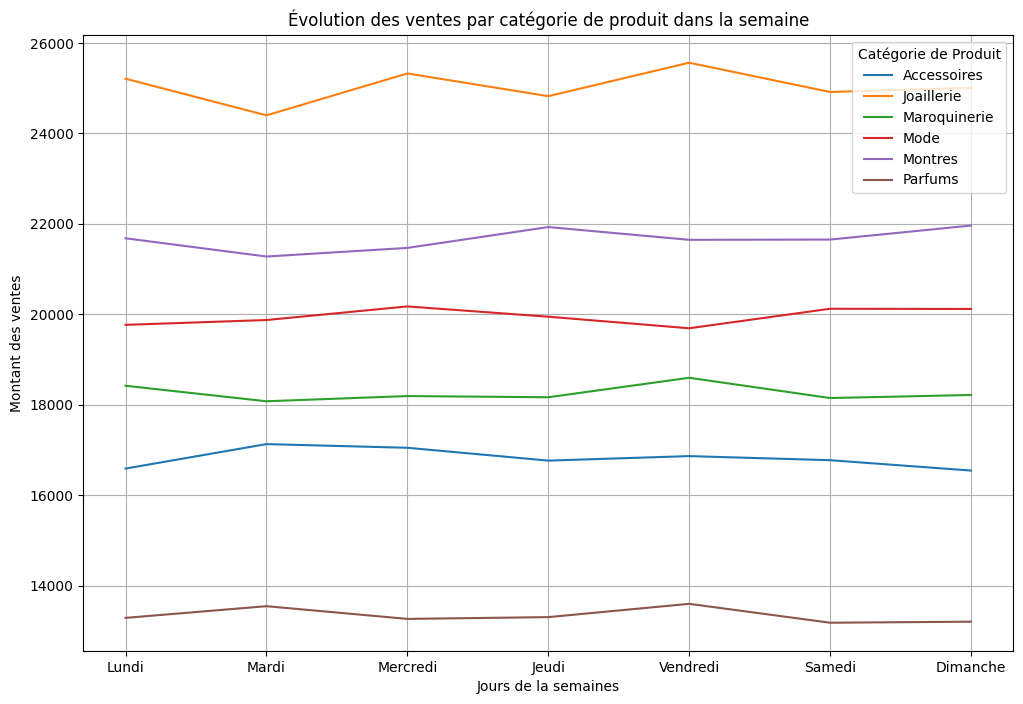

In [466]:
# Grouper par année, mois, et catégorie de produit pour calculer la somme des ventes
df_category_sales = df.groupby([ 'Jour_Semaine', 'Catégorie'])['Montant_Ventes_Totales'].mean().reset_index()

df_category_sales


# Création du graphique en lignes multiples
plt.figure(figsize=(12, 8))
for category in df_category_sales['Catégorie'].unique():
    data = df_category_sales[df_category_sales['Catégorie'] == category]
    plt.plot(data['Jour_Semaine'], data['Montant_Ventes_Totales'], label=category)

plt.title("Évolution des ventes par catégorie de produit dans la semaine")
plt.xlabel("Jours de la semaines")
plt.ylabel("Montant des ventes")

# Personnaliser les ticks de l'axe x avec les noms des jours
jours_semaine = {1: 'Lundi', 2: 'Mardi', 3: 'Mercredi', 4: 'Jeudi', 5: 'Vendredi', 6: 'Samedi', 7: 'Dimanche'}


# plt.xticks(ticks=range(1, 8), labels=df_category_sales['Jour_Semaine'].map(jours_semaine).unique())
plt.xticks(ticks=range(1, 8), labels=[jours_semaine[j] for j in range(1, 8)])

plt.legend(title="Catégorie de Produit")
plt.grid(True)
plt.show()

# Boxplots des colonnes de ventes (hors Montant_Ventes_Totales

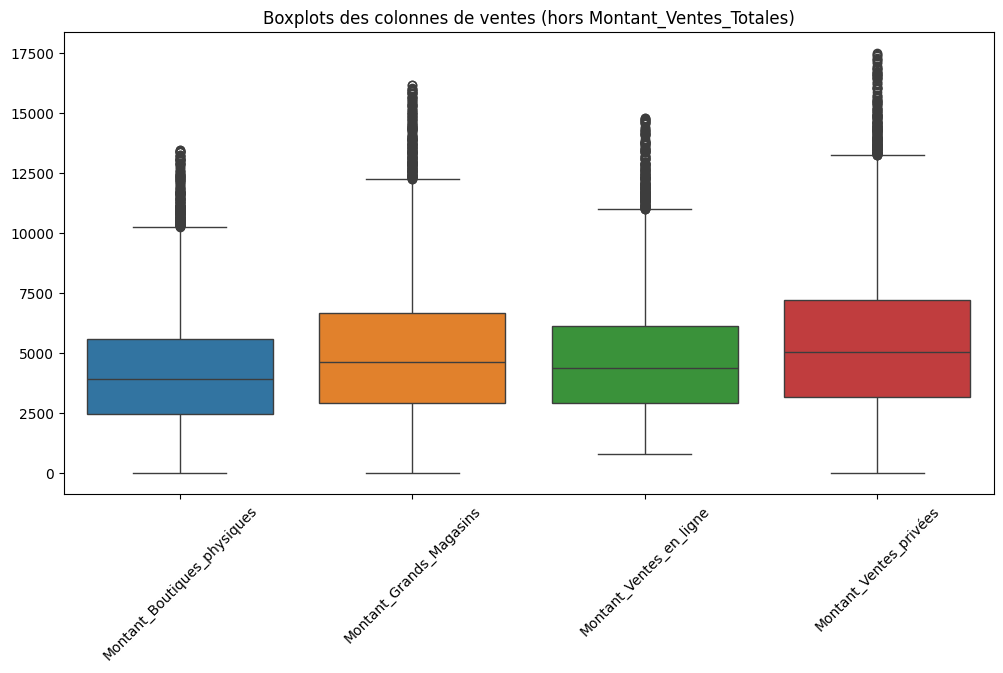

In [467]:
numeric_columns = df.select_dtypes(include='number').drop(columns=['Jour_Semaine', 'Année', 'Événement_spécial','Jour', 'Mois'])

# S,éparer Montant_Ventes_Totales des autres montants de ventes
vente_totale = numeric_columns[['Montant_Ventes_Totales']]
autres_ventes = numeric_columns.drop(columns=['Montant_Ventes_Totales'])

# Création du boxplot pour les colonnes de ventes spécifiques
plt.figure(figsize=(12, 6))
sns.boxplot(data=autres_ventes)
plt.title("Boxplots des colonnes de ventes (hors Montant_Ventes_Totales)")
plt.xticks(rotation=45)
plt.show()


# Boxplot pour Montant_Ventes_Totales

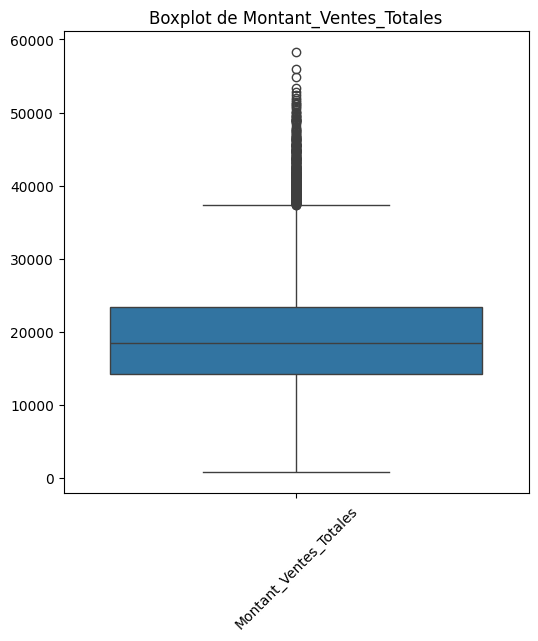

In [468]:

# Création du boxplot pour Montant_Ventes_Totales
plt.figure(figsize=(6, 6))
sns.boxplot(data=vente_totale)
plt.title("Boxplot de Montant_Ventes_Totales")
plt.xticks(rotation=45)
plt.show()

# Boxplot des montants de ventes totales par catégorie de produit

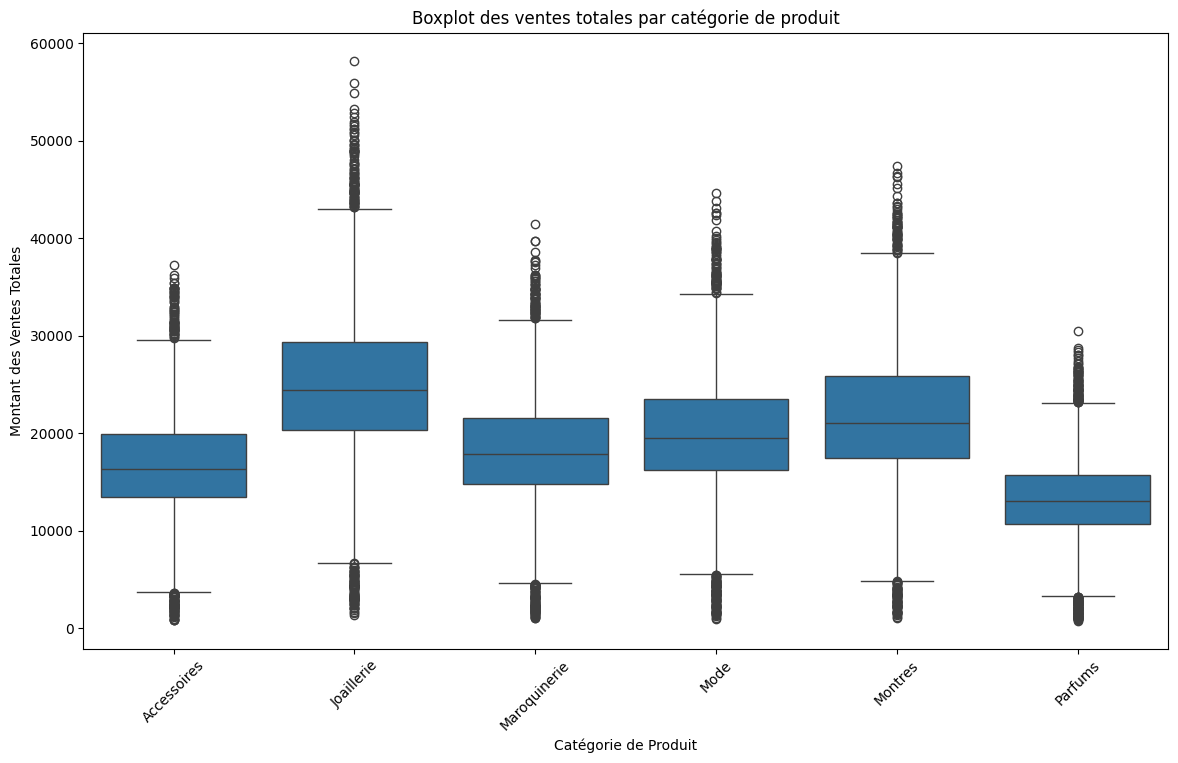

In [469]:
# Créer le boxplot des montants de ventes totales par catégorie de produit
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Catégorie', y='Montant_Ventes_Totales')

# Ajouter un titre et les labels des axes
plt.title("Boxplot des ventes totales par catégorie de produit")
plt.xlabel("Catégorie de Produit")
plt.ylabel("Montant des Ventes Totales")
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

# Machine Learning

In [470]:
import numpy as np
import statsmodels.tsa.stattools as ts

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

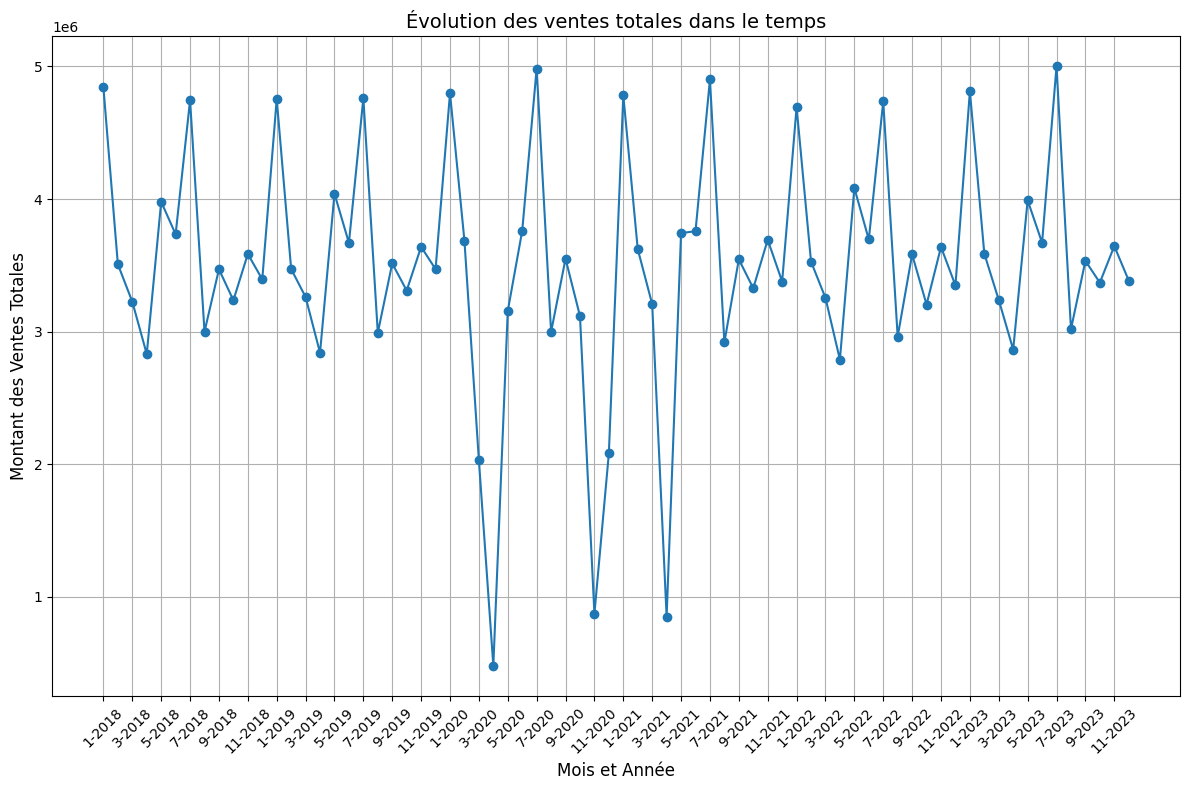

In [471]:

# Grouper les données par mois et année et calculer la somme des ventes
df_monthly_sales = df.groupby(['Année', 'Mois'])['Montant_Ventes_Totales'].sum().reset_index()

# Créer le graphique des ventes totales en fonction du temps (mois et année)
plt.figure(figsize=(12, 8))

# Tracer l'évolution des ventes totales
plt.plot(df_monthly_sales['Mois'].astype(str) + '-' + df_monthly_sales['Année'].astype(str), df_monthly_sales['Montant_Ventes_Totales'], marker='o')

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes totales dans le temps", fontsize=14)
plt.xlabel("Mois et Année", fontsize=12)
plt.ylabel("Montant des Ventes Totales", fontsize=12)

ticks = range(0, len(df_monthly_sales), 2)
labels = df_monthly_sales['Mois'].astype(str) + '-' + df_monthly_sales['Année'].astype(str)
plt.xticks(ticks=ticks, labels=labels[ticks], rotation=45)

plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [472]:
df

,Date,Catégorie,Événement_spécial,Mois,Année,Jour,Montant_Boutiques_physiques,Montant_Grands_Magasins,Montant_Ventes_en_ligne,Montant_Ventes_privées,Jour_Semaine,Montant_Ventes_Totales
0,2018-01-01,Accessoires,1,1,2018,1,3037.0800,4325.0400,1630,7759,1,16751.1200
1,2018-01-01,Joaillerie,1,1,2018,1,2375.1240,8362.8960,4696,7728,1,23162.0200
2,2018-01-01,Maroquinerie,1,1,2018,1,2996.7600,3608.7720,4259,3606,1,14470.5320
3,2018-01-01,Mode,1,1,2018,1,5969.7480,7871.2920,6761,3458,1,24060.0400
4,2018-01-01,Montres,1,1,2018,1,2920.0560,2020.9320,7213,2747,1,14900.9880
...,...,...,...,...,...,...,...,...,...,...,...,...
13141,2023-12-31,Joaillerie,1,12,2023,31,8205.8020,5335.8735,2333,7647,7,23521.6755
13142,2023-12-31,Maroquinerie,1,12,2023,31,2901.4845,4469.3255,3104,2663,7,13137.8100
13143,2023-12-31,Mode,1,12,2023,31,1815.7810,8218.6245,4610,5516,7,20160.4055
13144,2023-12-31,Montres,1,12,2023,31,1933.8055,2567.8465,7552,8584,7,20637.6520


In [473]:
dates_covid = [
    ('2020-03-01', '2020-05-31'),
    ('2020-10-01', '2020-12-31'),
    ('2021-04-01', '2021-05-31')
]
# Exclure les années impactées par le COVID-19 pour établir une base saine
base_df = df[(df['Année'] < 2020) | (df['Année'] > 2021)]

# Calcul des moyennes mensuelles par catégorie et canal de vente
monthly_means = base_df.groupby(['Catégorie', 'Mois'])[
    ['Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées']
].mean()

# Remplacement des valeurs pour les périodes de COVID-19
for start_date, end_date in dates_covid:
    # Filtrer les lignes correspondant à la période
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    # Appliquer les moyennes mensuelles par catégorie
    for category in df['Catégorie'].unique():
        category_mask = mask & (df['Catégorie'] == category)
        for col in ['Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées']:
            # Récupérer le mois pour chaque ligne et appliquer la moyenne correspondante
            df.loc[category_mask, col] = df.loc[category_mask, 'Mois'].map(
                lambda m: monthly_means.loc[(category, m), col]
            )

        # Recalculer la colonne 'Montant_Ventes_Totales' après modification des canaux de ventes
        df.loc[category_mask, 'Montant_Ventes_Totales'] = (
            df.loc[category_mask, 'Montant_Boutiques_physiques'] +
            df.loc[category_mask, 'Montant_Grands_Magasins'] +
            df.loc[category_mask, 'Montant_Ventes_en_ligne'] +
            df.loc[category_mask, 'Montant_Ventes_privées']
        )

# Afficher un aperçu des données modifiées
df.head()



C:\Users\quentin\AppData\Local\Temp\ipykernel_18688\1363831038.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3573.48387097 3573.48387097 3573.48387097 3573.48387097 3573.48387097
 3573.48387097 3573.48387097 3573.48387097 3573.48387097 3573.48387097
 3573.48387097 3573.48387097 3573.48387097 3573.48387097 3573.48387097
 3573.48387097 3573.48387097 3573.48387097 3573.48387097 3573.48387097
 3573.48387097 3573.48387097 3573.48387097 3573.48387097 3573.48387097
 3573.48387097 3573.48387097 3573.48387097 3573.48387097 3573.48387097
 3573.48387097 3357.91666667 3357.91666667 3357.91666667 3357.91666667
 3357.91666667 3357.91666667 3357.91666667 3357.91666667 3357.91666667
 3357.91666667 3357.91666667 3357.91666667 3357.91666667 3357.91666667
 3357.91666667 3357.91666667 3357.91666667 3357.91666667 3357.91666667
 3357.91666667 3357.91666667 3357.91666667 3357.91666667 3357.91666667
 3357.91666667 3357.

,Date,Catégorie,Événement_spécial,Mois,Année,Jour,Montant_Boutiques_physiques,Montant_Grands_Magasins,Montant_Ventes_en_ligne,Montant_Ventes_privées,Jour_Semaine,Montant_Ventes_Totales
0,2018-01-01,Accessoires,1,1,2018,1,3037.080,4325.040,1630.0,7759.0,1,16751.120
1,2018-01-01,Joaillerie,1,1,2018,1,2375.124,8362.896,4696.0,7728.0,1,23162.020
2,2018-01-01,Maroquinerie,1,1,2018,1,2996.760,3608.772,4259.0,3606.0,1,14470.532
3,2018-01-01,Mode,1,1,2018,1,5969.748,7871.292,6761.0,3458.0,1,24060.040
4,2018-01-01,Montres,1,1,2018,1,2920.056,2020.932,7213.0,2747.0,1,14900.988


In [474]:
# Filtrer les données pour avril 2020
df_april_2020 = df[(df['Date'] >= '2020-04-01') & (df['Date'] <= '2020-04-30')].copy()

# Affichage des ventes pour avril 2020
df_april_2020[['Date', 'Catégorie', 'Montant_Boutiques_physiques', 'Montant_Grands_Magasins', 'Montant_Ventes_en_ligne', 'Montant_Ventes_privées', 'Montant_Ventes_Totales']]

# Vérification de la somme des ventes
df_april_2020['Montant_Ventes_Totales_calculé'] = (
    df_april_2020['Montant_Boutiques_physiques'] +
    df_april_2020['Montant_Grands_Magasins'] +
    df_april_2020['Montant_Ventes_en_ligne'] +
    df_april_2020['Montant_Ventes_privées']
)

# Affichage de l'erreur entre Montant_Ventes_Totales et la somme des canaux
# print(df_april_2020[['Montant_Ventes_Totales', 'Montant_Ventes_Totales_calculé']].head())

# # Affichage des premières lignes pour inspection
df_april_2020


,Date,Catégorie,Événement_spécial,Mois,Année,Jour,Montant_Boutiques_physiques,Montant_Grands_Magasins,Montant_Ventes_en_ligne,Montant_Ventes_privées,Jour_Semaine,Montant_Ventes_Totales,Montant_Ventes_Totales_calculé
4926,2020-04-01,Accessoires,1,4,2020,1,2919.376000,3591.214500,3357.916667,3782.608333,3,13651.115500,13651.115500
4927,2020-04-01,Joaillerie,1,4,2020,1,4484.613167,5564.755000,5167.333333,5728.508333,3,20945.209833,20945.209833
4928,2020-04-01,Maroquinerie,1,4,2020,1,3287.485583,3778.836333,3552.883333,4234.475000,3,14853.680250,14853.680250
4929,2020-04-01,Mode,1,4,2020,1,3687.418250,4409.421500,3834.575000,4764.175000,3,16695.589750,16695.589750
4930,2020-04-01,Montres,1,4,2020,1,3796.743083,4422.872083,4112.266667,4862.250000,3,17194.131833,17194.131833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5101,2020-04-30,Joaillerie,1,4,2020,30,4484.613167,5564.755000,5167.333333,5728.508333,4,20945.209833,20945.209833
5102,2020-04-30,Maroquinerie,1,4,2020,30,3287.485583,3778.836333,3552.883333,4234.475000,4,14853.680250,14853.680250
5103,2020-04-30,Mode,1,4,2020,30,3687.418250,4409.421500,3834.575000,4764.175000,4,16695.589750,16695.589750
5104,2020-04-30,Montres,1,4,2020,30,3796.743083,4422.872083,4112.266667,4862.250000,4,17194.131833,17194.131833


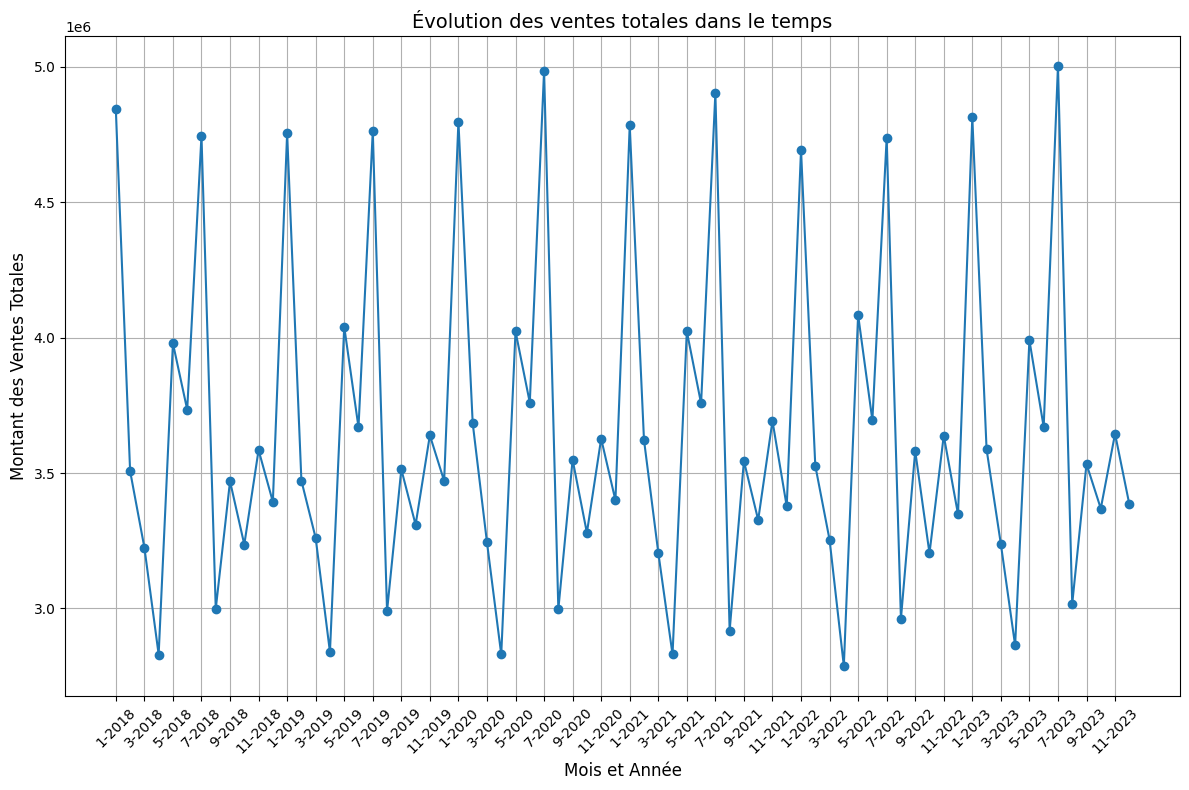

In [475]:

# Grouper les données par mois et année et calculer la somme des ventes
df_monthly_sales = df.groupby(['Année', 'Mois'])['Montant_Ventes_Totales'].sum().reset_index()

# Créer le graphique des ventes totales en fonction du temps (mois et année)
plt.figure(figsize=(12, 8))

# Tracer l'évolution des ventes totales
plt.plot(df_monthly_sales['Mois'].astype(str) + '-' + df_monthly_sales['Année'].astype(str), df_monthly_sales['Montant_Ventes_Totales'], marker='o')

# Ajouter un titre et des labels aux axes
plt.title("Évolution des ventes totales dans le temps", fontsize=14)
plt.xlabel("Mois et Année", fontsize=12)
plt.ylabel("Montant des Ventes Totales", fontsize=12)

ticks = range(0, len(df_monthly_sales), 2)
labels = df_monthly_sales['Mois'].astype(str) + '-' + df_monthly_sales['Année'].astype(str)
plt.xticks(ticks=ticks, labels=labels[ticks], rotation=45)

plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [476]:
# Créer une colonne 'Date' à partir des colonnes 'Année' et 'Mois', en ajoutant un jour par défaut (01)
df_monthly_sales['Date'] = pd.to_datetime(df_monthly_sales['Année'].astype(str) + '-' + df_monthly_sales['Mois'].astype(str) + '-01')

# Créer un DataFrame avec la date en index et le montant des ventes
df_donne = df_monthly_sales[['Date', 'Montant_Ventes_Totales']].set_index('Date')



df_donne


,Montant_Ventes_Totales
Date,
2018-01-01,4842017.912
2018-02-01,3507388.548
2018-03-01,3225109.111
2018-04-01,2830157.150
2018-05-01,3979012.872
...,...
2023-08-01,3017474.080
2023-09-01,3533375.531
2023-10-01,3369059.107


On remarque une saisonalité, on est sur du ARIMA et pas SARIMA, donc on déssaisonalise à la main :

Déssaisonalisation
--

On essaie une décomposition additive et multiplicative pour voir ce qui fonctionne le mieux

In [477]:
result_add = seasonal_decompose(df_donne["Montant_Ventes_Totales"], model='additive', extrapolate_trend='freq')
result_mul = seasonal_decompose(df_donne["Montant_Ventes_Totales"], model='multiplicative', extrapolate_trend='freq')


Résultat :
---
    Additive :


In [478]:
print(ts.adfuller(result_add.resid.dropna())[1])

4.334551694648359e-09


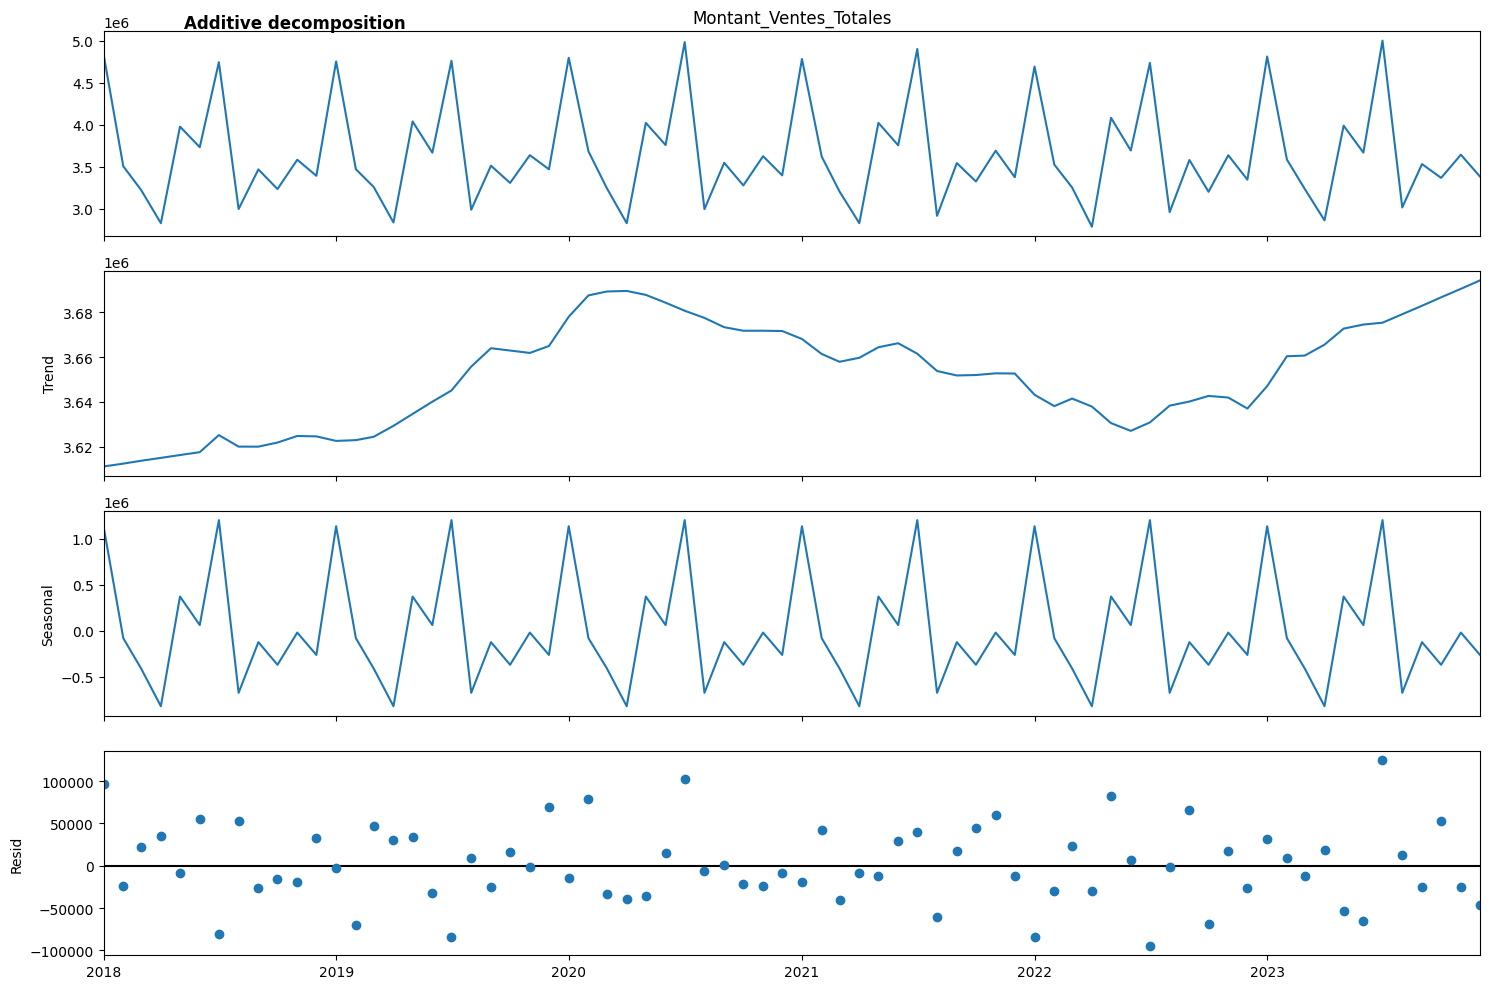

In [479]:
plt.rcParams.update({'figure.figsize': (15,10)})
result_add.plot().suptitle('Additive decomposition', x=0.2, fontweight='bold')
plt.show()

    Multiplicative :

In [480]:
print(ts.adfuller( result_mul.resid.dropna())[1])

8.725424249027924e-07


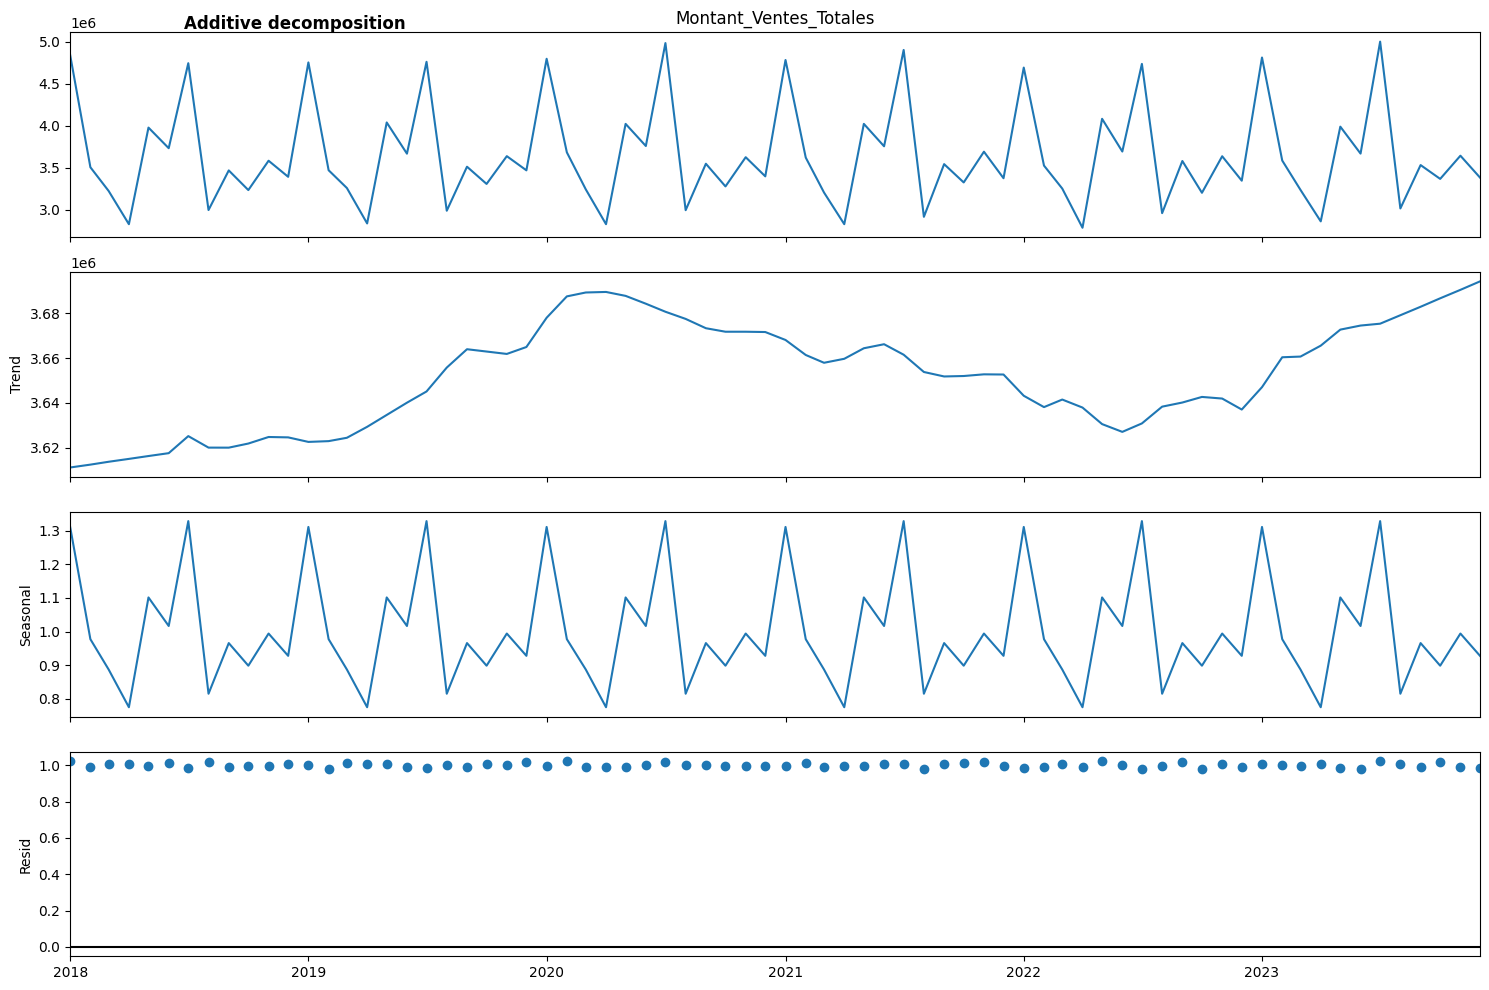

In [481]:
result_mul.plot().suptitle('Additive decomposition', x=0.2, fontweight='bold')
plt.show()


    Les variations des résidus sont plus égales dans le multplicatif que dans l'additif, le multiplicatif semmble donc être une meilleur décomposition pour ce dataset



In [482]:
df_donne['VentesDeseasonalized'] = result_mul.trend * result_mul.resid

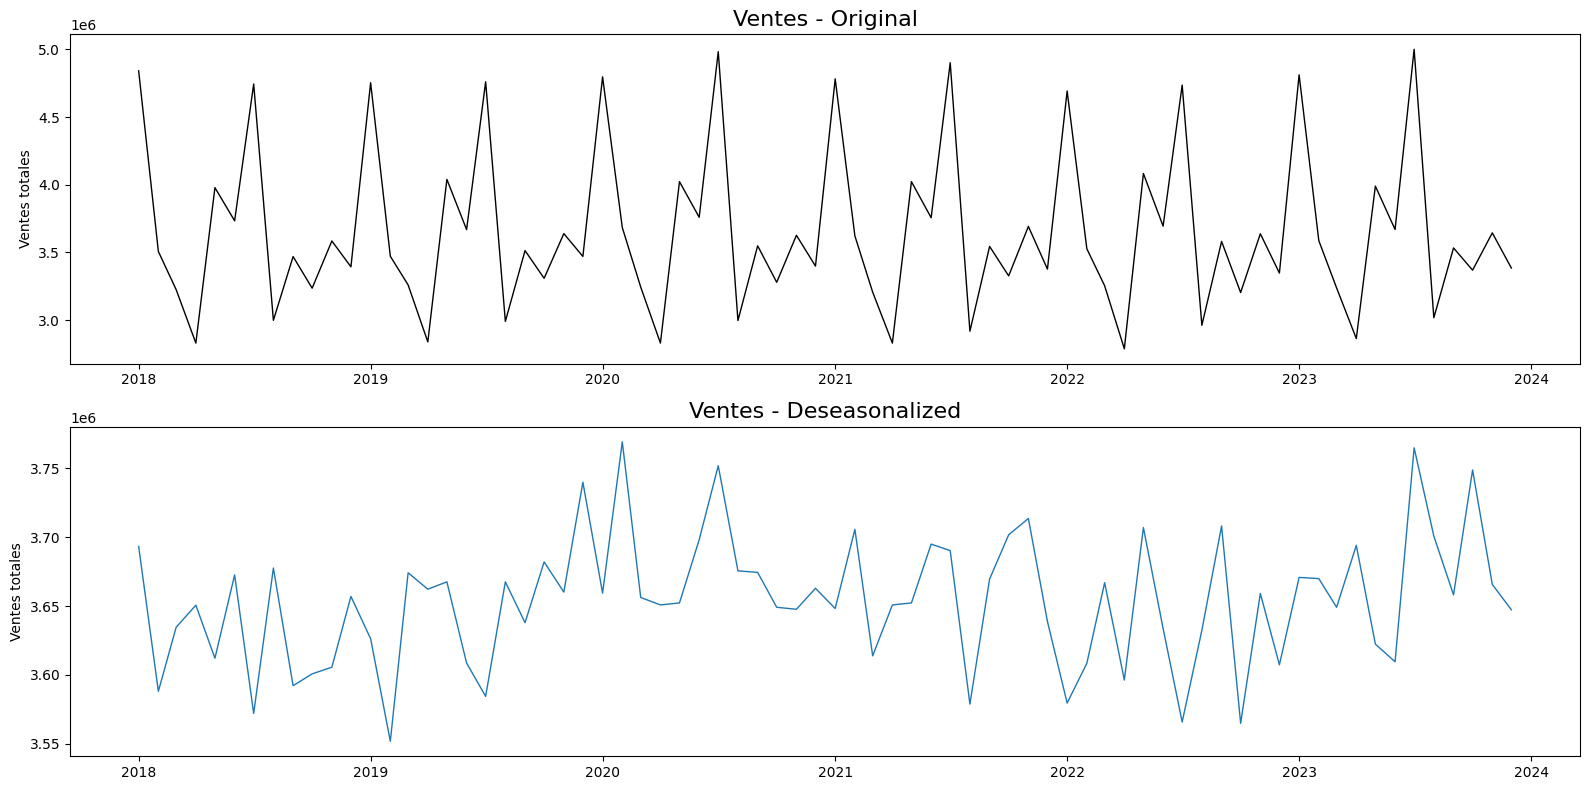

In [483]:
# Définir la taille de la figure
plt.figure(figsize=(16, 8))

# Premier sous-graphe : Série originale 'Montant_Ventes_Totales'
plt.subplot(2, 1, 1)  # 2 lignes, 1 colonne, premier graphique
plt.plot(df_donne['Montant_Ventes_Totales'], color="black", linewidth=1)
plt.title("Ventes - Original", fontsize=16)
plt.ylabel("Ventes totales")

# Deuxième sous-graphe : Série désaisonnalisée 'VentesDeseasonalized'
plt.subplot(2, 1, 2)  # 2 lignes, 1 colonne, deuxième graphique
plt.plot(df_donne['VentesDeseasonalized'], linewidth=1)
plt.title("Ventes - Deseasonalized", fontsize=16)
plt.ylabel("Ventes totales")

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()

# Afficher les graphiques
plt.show()

Maintenant on différencie pour stationner nos données

Différenciation
--

In [484]:
print('p-value zero diff :', ts.adfuller(df_donne['VentesDeseasonalized'])[1])
print('p-value 1 diff :', ts.adfuller(df_donne['VentesDeseasonalized'].diff().dropna())[1])

df_donne['diffVentes'] = df_donne['VentesDeseasonalized'].diff().dropna()

p-value zero diff : 1.2372448237737405e-12
p-value 1 diff : 1.2894347577840756e-08


on prend d = 1

Maintenant on détermine le q et le p

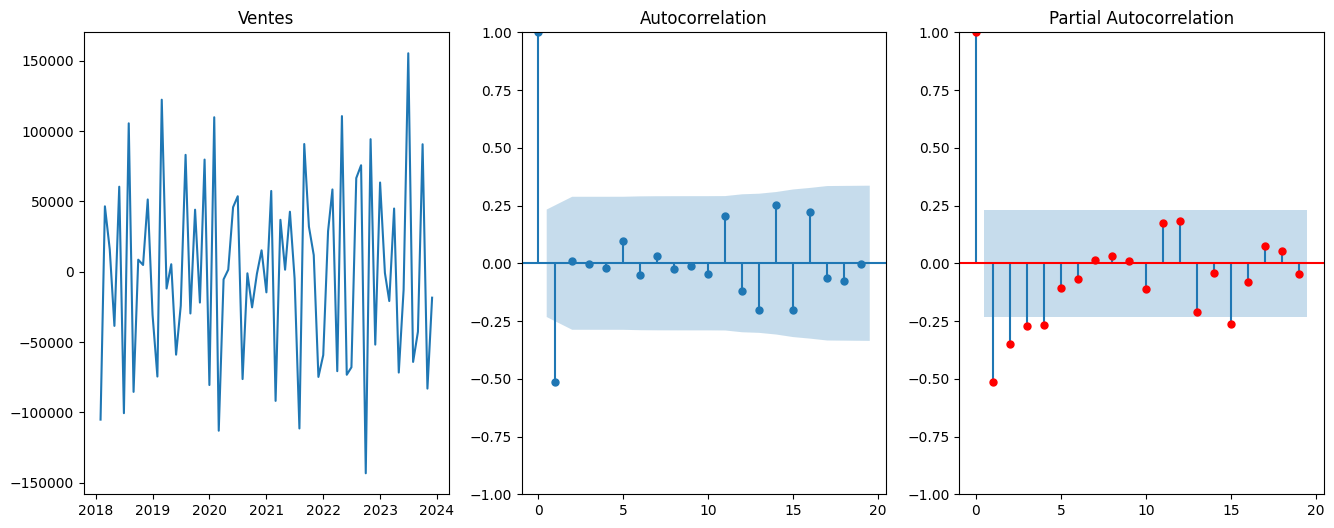

In [495]:
fig,axes = plt.subplots(1,3,figsize=(16,6))
axes[0].plot(df_donne.index,df_donne['diffVentes']); axes[0].set_title('Ventes')
plot_acf(df_donne['diffVentes'].dropna(), ax = axes[1])
plot_pacf(df_donne['diffVentes'].dropna(), ax = axes[2], c='r')

plt.show()

pour l'instant p = 4, d = 1, q = 1

Et donc maintenant qu'on a tout nos paramètres on train le modèle !
--

On prend comme split point 62 (80%) des 78 lignes

In [486]:
splitPoint = 62

train = df_donne['VentesDeseasonalized'][0:splitPoint]
test = df_donne['VentesDeseasonalized'][splitPoint:]

arima = ARIMA(train,order=(4,1,1), trend='t')
arima = arima.fit()

arima.summary()

C:\Users\quentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\quentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\quentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     VentesDeseasonalized   No. Observations:                   62
Model:                   ARIMA(4, 1, 1)   Log Likelihood                -767.365
Date:                  Fri, 22 Nov 2024   AIC                           1548.729
Time:                          14:53:15   BIC                           1563.505
Sample:                      01-01-2018   HQIC                          1554.520
                           - 02-01-2023                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -382.4026   4572.824     -0.084      0.933   -9344.972    8580.167
ar.L1          0.4724      1.830      0.258      0.796      -3.114       4.059
ar.L2          0.0316      0.094      0.336      0.737      -0.153       0.216
ar.L3         -0.0040      0.054     -0.073      0.942      -0.110       0.102
ar.L4         -0.0049      0.028     -0.175      0.861      -0.060       0.050
ma.L1         -0.5092      1.830     -0.278      0.781      -4.097       3.078
sigma2       2.08e+09      0.004   5.45e+11      0.000    2.08e+09    2.08e+09
===================================================================================
Ljung-Box (L1) (Q):                  17.14   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.00   Prob(JB):                         0.43
Heteroskedasticity (H):               1.56   Skew:                            -0.13
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+28. Standard errors may be unstable.
"""

In [487]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     VentesDeseasonalized   No. Observations:                   62
Model:                   ARIMA(4, 1, 1)   Log Likelihood                -767.365
Date:                  Fri, 22 Nov 2024   AIC                           1548.729
Time:                          14:53:15   BIC                           1563.505
Sample:                      01-01-2018   HQIC                          1554.520
                           - 02-01-2023                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -382.4026   4572.824     -0.084      0.933   -9344.972    8580.167
ar.L1          0.4724      1.830      0.258      0.796      -3.114       4.059
ar.L2          0.0316      0.094      0.336      0.737      -0.153       0.216
ar.L3         -0.0040      0.054     -0.073      0.942      -0.110       0.102
ar.L4         -0.0049      0.028     -0.175      0.861      -0.060       0.050
ma.L1         -0.5092      1.830     -0.278      0.781      -4.097       3.078
sigma2       2.08e+09      0.004   5.45e+11      0.000    2.08e+09    2.08e+09
===================================================================================
Ljung-Box (L1) (Q):                  17.14   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.00   Prob(JB):                         0.43
Heteroskedasticity (H):               1.56   Skew:                            -0.13
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+28. Standard errors may be unstable.
"""

In [488]:
forecast_results= arima.get_forecast(len(test), alpha=0.95)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

C:\Users\quentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [489]:
confidence_int

array([[3580735.57883771, 3759513.27259175],
       [3545874.72671051, 3794087.6902037 ],
       [3517646.83251394, 3821189.19525593],
       [3493769.92445262, 3844146.18428864],
       [3472847.54967411, 3864211.81481925],
       [3453953.2496328 , 3882292.07393699],
       [3436575.78185576, 3898880.9639945 ],
       [3420384.21915565, 3914296.06269904],
       [3405154.5879894 , 3928755.2769289 ],
       [3390727.21921059, 3942415.15728   ]])

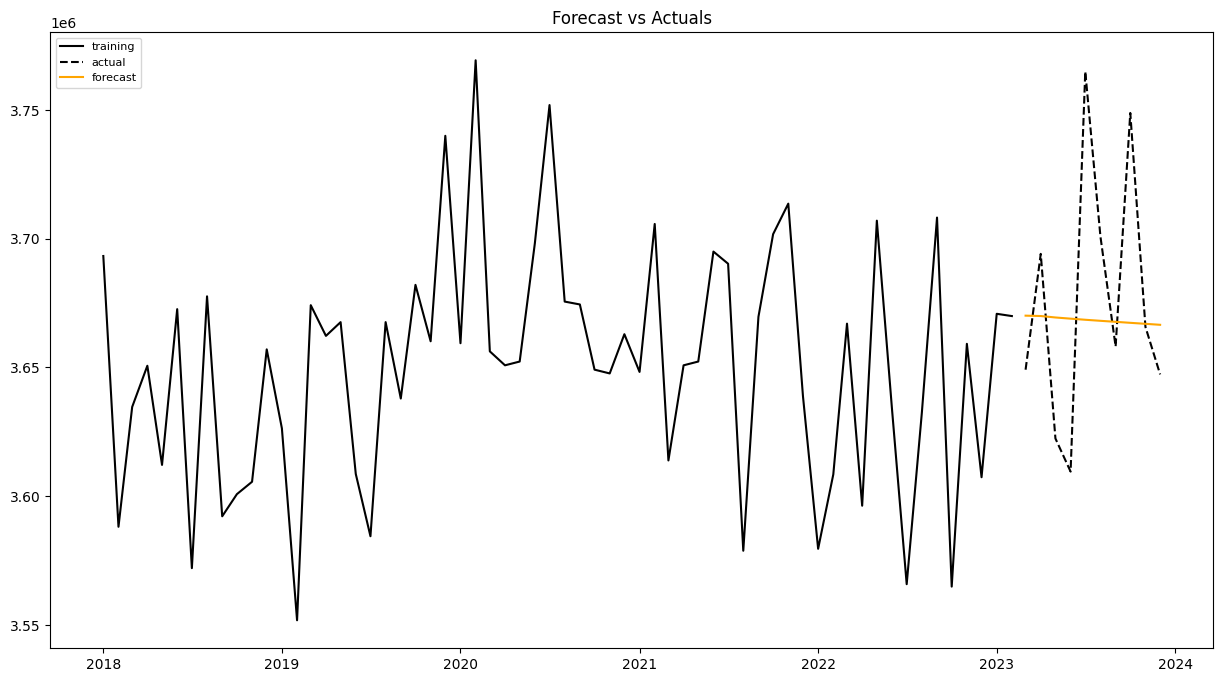

In [490]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    # is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    # lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    # upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(15, 8), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    
    # if is_confidence_int:
    #     plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);


plot_forecast(forecast,train,test,confidence_int[:,0],confidence_int[:,1])


On rajoute la saisonalités à la prédiction

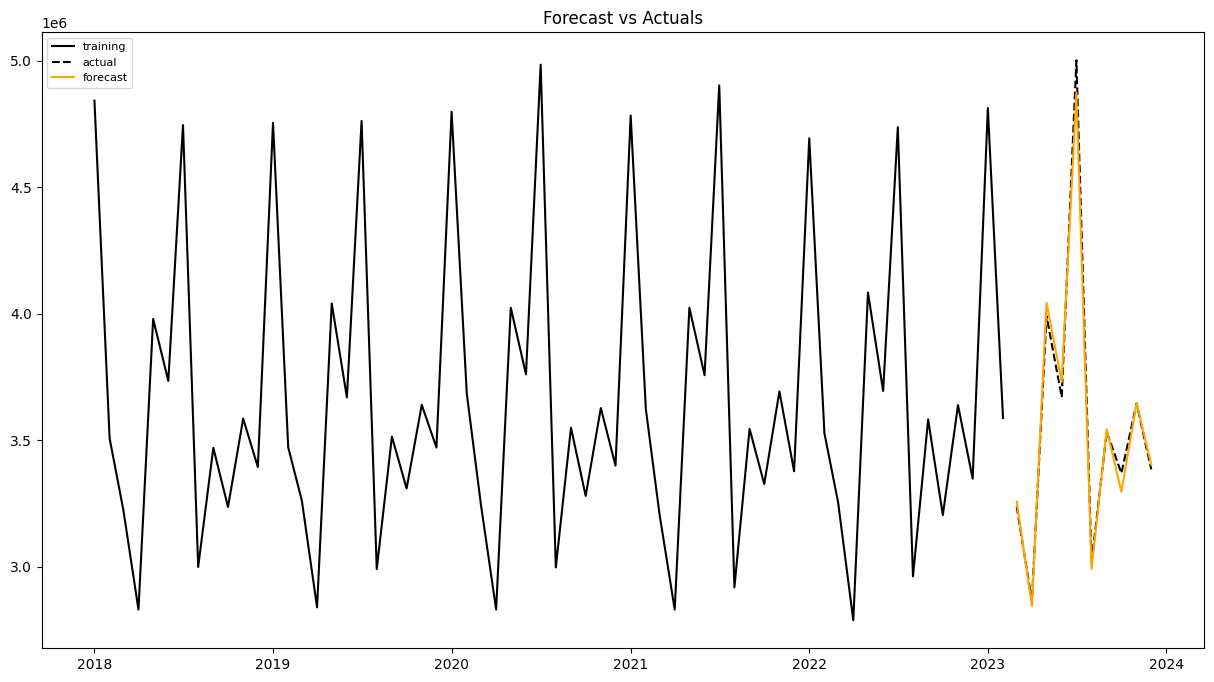

In [491]:
# Re-compose back to initial TS

forecast_recons = forecast * result_mul.seasonal[splitPoint:]
train_recons = train * result_mul.seasonal[0:splitPoint]
test_recons = test * result_mul.seasonal[splitPoint:]
lower_recons = confidence_int[:, 0] * result_mul.seasonal[splitPoint:]
upper_recons = confidence_int[:, 1] * result_mul.seasonal[splitPoint:]

# Plot
plot_forecast(forecast_recons, train_recons, test_recons, lower_recons.values, upper_recons.values)

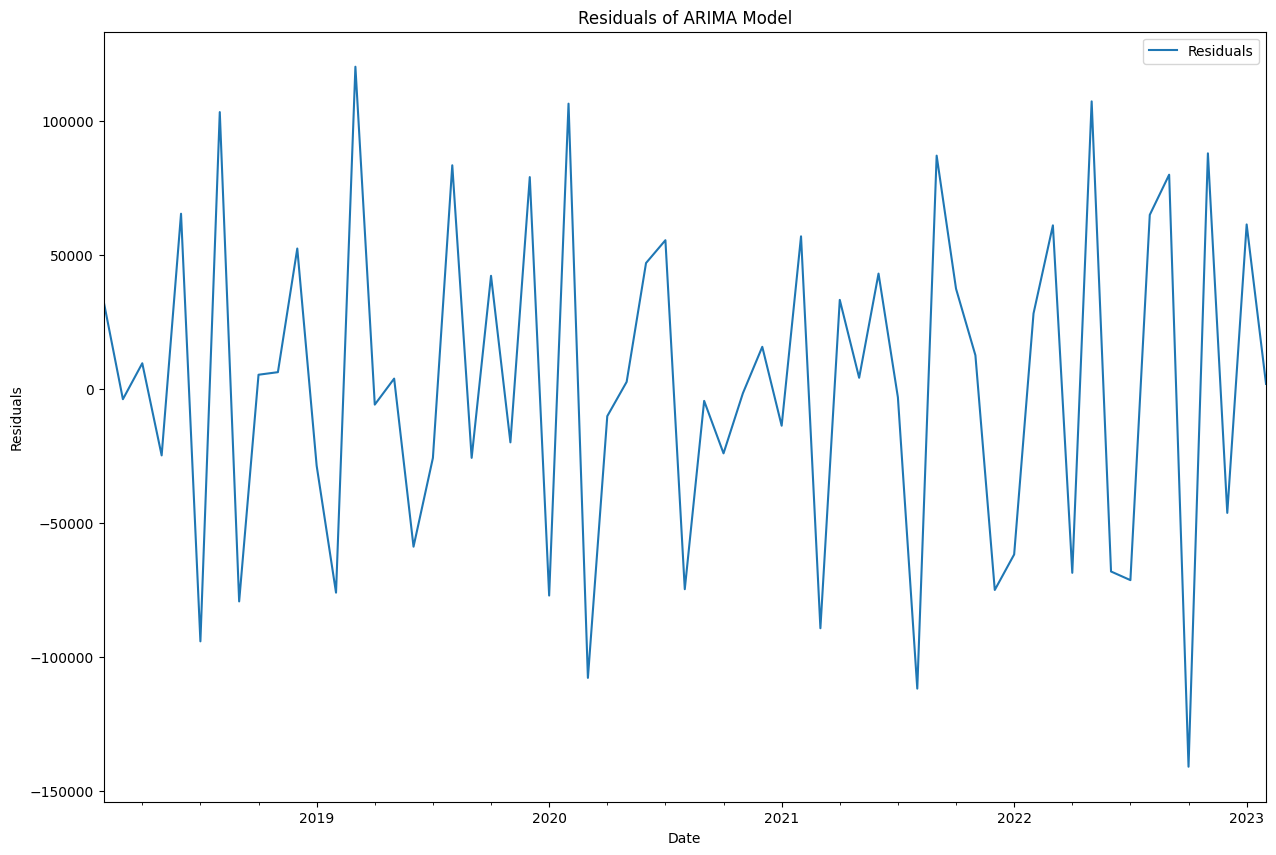

In [492]:
residuals = pd.DataFrame(arima.resid, columns=['Residuals'])

residuals = residuals[1:]

ax = residuals.plot(title="Residuals of ARIMA Model")
ax.set_xlabel("Date")
ax.set_ylabel("Residuals")
plt.show()
